Week 1 

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I have separated the csv file into two beforehand and hence have uploaded two different files here.

We could have done that here only by making another dataset for those values which have empty diameter value, but there was one data which was not correct according to me as it had some percentage sign or so in the diameter value. Hence, I manually emptied that cell and divided our dataset into two.

In [107]:
train = pd.read_csv(r'/content/drive/MyDrive/train.csv')
test = pd.read_csv(r'/content/drive/MyDrive/test.csv')

In [108]:
train.head()

name         a         e         i          om           w         q  \
0  NaN  1.028876  0.144621  1.321926   76.871027   88.835789  0.880078   
1  NaN  1.447192  0.435651  0.458983  152.033180  314.574438  0.816721   
2  NaN  1.401426  0.300327  3.533720  192.033456  335.403022  0.980541   
3  NaN  1.214106  0.218542  0.314485  255.919407   36.856749  0.948773   
4  NaN  1.579408  0.381353  5.716522    2.327029  214.166519  0.977096   

         ad     per_y  data_arc  ...  UB  IR  spec_B spec_T   G      moid  \
0  1.177673  1.043645       3.0  ... NaN NaN     NaN    NaN NaN  0.000875   
1  2.077662  1.740994       7.0  ... NaN NaN     NaN    NaN NaN  0.002754   
2  1.822312  1.659066      10.0  ... NaN NaN     NaN    NaN NaN  0.001372   
3  1.479439  1.337806       3.0  ... NaN NaN     NaN    NaN NaN  0.001253   
4  2.181721  1.984951       7.0  ... NaN NaN     NaN    NaN NaN  0.015294   

  class         n         per          ma  
0   APO  0.944408  381.191226  333.147651  
1   APO  0.566129  635.898021   30.796013  
2   APO  0.594085  605.973788  176.618145  
3   APO  0.736748  488.633600  322.437088  
4   APO  0.496549  725.003524  192.232616  

[5 rows x 31 columns]

In [109]:
test.head()

name         a         e          i          om           w         q  \
0     Psyche  2.923814  0.133568   3.096005  150.045666  228.823071  2.533285   
1      Hagar  2.654040  0.171983  11.505647  190.799959  104.993824  2.197591   
2       Hela  2.610998  0.410284  15.299180  242.551766   91.399514  1.539746   
3     Albert  2.638780  0.546301  11.564845  183.887287  156.163668  1.197212   
4  Athanasia  2.243362  0.177505   4.234895   95.073806  123.549777  1.845154   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T    G      moid  \
0  3.314343  4.999571   12856.0  ...  0.299 NaN       X      M  0.2  1.535800   
1  3.110489  4.323837   40313.0  ...    NaN NaN     NaN    NaN  NaN  1.215450   
2  3.682249  4.219081   42540.0  ...  0.386 NaN      Sq      S  NaN  0.624487   
3  4.080348  4.286601   39478.0  ...    NaN NaN       S    NaN  NaN  0.203359   
4  2.641570  3.360139   39112.0  ...    NaN NaN     NaN    NaN  NaN  0.841461   

  class         n          per          ma  
0   MBA  0.197142  1826.093319  288.335893  
1   MBA  0.227952  1579.281370  134.457728  
2   MCA  0.233612  1541.019467  237.586385  
3   AMO  0.229932  1565.680891   48.317252  
4   MBA  0.293329  1227.290668  295.120065  

[5 rows x 31 columns]

In [110]:
train.shape

(137635, 31)

In [111]:
test.shape

(702079, 31)

In [112]:
train.describe(include='all')

name              a              e              i             om  \
count    15123  137635.000000  137635.000000  137635.000000  137635.000000   
unique   15123            NaN            NaN            NaN            NaN   
top     Hathor            NaN            NaN            NaN            NaN   
freq         1            NaN            NaN            NaN            NaN   
mean       NaN       2.814612       0.145485      10.349235     169.827772   
std        NaN       1.522745       0.077574       6.835108     102.713411   
min        NaN       0.626226       0.000489       0.021855       0.000738   
25%        NaN       2.536710       0.089622       5.120694      82.334464   
50%        NaN       2.750853       0.138543       9.390074     160.438501   
75%        NaN       3.092538       0.191141      13.738623     256.268890   
max        NaN     389.145964       0.984348     170.323647     359.990858   

                    w              q             ad          per_y  \
count   137635.000000  137635.000000  137635.000000  137635.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       181.904210       2.402608       3.226617       4.884247   
std        103.556763       0.516171       2.896385      25.532657   
min          0.004466       0.081882       0.999956       0.495569   
25%         91.947794       2.068948       2.864437       4.040308   
50%        183.668021       2.363884       3.167516       4.562568   
75%        271.763348       2.685812       3.468609       5.438519   
max        359.995174      40.465671     772.201080    7676.742943   

             data_arc  ...          UB    IR  spec_B spec_T           G  \
count   137497.000000  ...  964.000000  1.00    1369    964  118.000000   
unique            NaN  ...         NaN   NaN      31    128         NaN   
top               NaN  ...         NaN   NaN       S      S         NaN   
freq              NaN  ...         NaN   NaN     368    329         NaN   
mean      8969.790337  ...    0.364175 -0.33     NaN    NaN    0.178559   
std       6165.189701  ...    0.095734   NaN     NaN    NaN    0.135162   
min          1.000000  ...    0.120000 -0.33     NaN    NaN   -0.250000   
25%       6291.000000  ...    0.289000 -0.33     NaN    NaN    0.100000   
50%       7572.000000  ...    0.360000 -0.33     NaN    NaN    0.185000   
75%       9731.000000  ...    0.439000 -0.33     NaN    NaN    0.250000   
max      72684.000000  ...    0.655000 -0.33     NaN    NaN    0.600000   

                 moid   class              n           per             ma  
count   137635.000000  137635  137635.000000  1.376350e+05  137635.000000  
unique            NaN      11            NaN           NaN            NaN  
top               NaN     MBA            NaN           NaN            NaN  
freq              NaN  126389            NaN           NaN            NaN  
mean         1.420145     NaN       0.219640  1.783971e+03     183.116021  
std          0.512243     NaN       0.056980  9.325803e+03     103.411484  
min          0.000166     NaN       0.000128  1.810067e+02       0.000517  
25%          1.082515     NaN       0.181231  1.475723e+03      94.300733  
50%          1.384930     NaN       0.216024  1.666478e+03     186.826029  
75%          1.699390     NaN       0.243948  1.986419e+03     271.467660  
max         39.507000     NaN       1.988877  2.803930e+06     359.999979  

[11 rows x 31 columns]

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            15123 non-null   object 
 1   a               137635 non-null  float64
 2   e               137635 non-null  float64
 3   i               137635 non-null  float64
 4   om              137635 non-null  float64
 5   w               137635 non-null  float64
 6   q               137635 non-null  float64
 7   ad              137635 non-null  float64
 8   per_y           137635 non-null  float64
 9   data_arc        137497 non-null  float64
 10  condition_code  137635 non-null  int64  
 11  n_obs_used      137635 non-null  int64  
 12  H               136888 non-null  float64
 13  neo             137635 non-null  object 
 14  pha             137635 non-null  object 
 15  diameter        137635 non-null  float64
 16  extent          15 non-null      object 
 17  albedo    

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            6844 non-null    object 
 1   a               702077 non-null  float64
 2   e               702079 non-null  float64
 3   i               702079 non-null  float64
 4   om              702079 non-null  float64
 5   w               702079 non-null  float64
 6   q               702079 non-null  float64
 7   ad              702073 non-null  float64
 8   per_y           702078 non-null  float64
 9   data_arc        686743 non-null  float64
 10  condition_code  701212 non-null  object 
 11  n_obs_used      702079 non-null  int64  
 12  H               700137 non-null  float64
 13  neo             702073 non-null  object 
 14  pha             685637 non-null  object 
 15  diameter        0 non-null       float64
 16  extent          3 non-null       object 
 17  albedo    

Dropping the diameter column from our test dataset.

In [115]:
test=test.drop('diameter',axis=1)
test.head()

name         a         e          i          om           w         q  \
0     Psyche  2.923814  0.133568   3.096005  150.045666  228.823071  2.533285   
1      Hagar  2.654040  0.171983  11.505647  190.799959  104.993824  2.197591   
2       Hela  2.610998  0.410284  15.299180  242.551766   91.399514  1.539746   
3     Albert  2.638780  0.546301  11.564845  183.887287  156.163668  1.197212   
4  Athanasia  2.243362  0.177505   4.234895   95.073806  123.549777  1.845154   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T    G      moid  \
0  3.314343  4.999571   12856.0  ...  0.299 NaN       X      M  0.2  1.535800   
1  3.110489  4.323837   40313.0  ...    NaN NaN     NaN    NaN  NaN  1.215450   
2  3.682249  4.219081   42540.0  ...  0.386 NaN      Sq      S  NaN  0.624487   
3  4.080348  4.286601   39478.0  ...    NaN NaN       S    NaN  NaN  0.203359   
4  2.641570  3.360139   39112.0  ...    NaN NaN     NaN    NaN  NaN  0.841461   

   class         n          per          ma  
0    MBA  0.197142  1826.093319  288.335893  
1    MBA  0.227952  1579.281370  134.457728  
2    MCA  0.233612  1541.019467  237.586385  
3    AMO  0.229932  1565.680891   48.317252  
4    MBA  0.293329  1227.290668  295.120065  

[5 rows x 30 columns]

In [116]:
train.count()

name               15123
a                 137635
e                 137635
i                 137635
om                137635
w                 137635
q                 137635
ad                137635
per_y             137635
data_arc          137497
condition_code    137635
n_obs_used        137635
H                 136888
neo               137635
pha               137635
diameter          137635
extent                15
albedo            136405
rot_per            11187
GM                    13
BV                  1004
UB                   964
IR                     1
spec_B              1369
spec_T               964
G                    118
moid              137635
class             137635
n                 137635
per               137635
ma                137635
dtype: int64

In [117]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
137630    False
137631    False
137632    False
137633    False
137634    False
Length: 137635, dtype: bool

In [118]:
test.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
702074    False
702075    False
702076    False
702077    False
702078    False
Length: 702079, dtype: bool

In [119]:
train.describe(include='all')

name              a              e              i             om  \
count    15123  137635.000000  137635.000000  137635.000000  137635.000000   
unique   15123            NaN            NaN            NaN            NaN   
top     Hathor            NaN            NaN            NaN            NaN   
freq         1            NaN            NaN            NaN            NaN   
mean       NaN       2.814612       0.145485      10.349235     169.827772   
std        NaN       1.522745       0.077574       6.835108     102.713411   
min        NaN       0.626226       0.000489       0.021855       0.000738   
25%        NaN       2.536710       0.089622       5.120694      82.334464   
50%        NaN       2.750853       0.138543       9.390074     160.438501   
75%        NaN       3.092538       0.191141      13.738623     256.268890   
max        NaN     389.145964       0.984348     170.323647     359.990858   

                    w              q             ad          per_y  \
count   137635.000000  137635.000000  137635.000000  137635.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       181.904210       2.402608       3.226617       4.884247   
std        103.556763       0.516171       2.896385      25.532657   
min          0.004466       0.081882       0.999956       0.495569   
25%         91.947794       2.068948       2.864437       4.040308   
50%        183.668021       2.363884       3.167516       4.562568   
75%        271.763348       2.685812       3.468609       5.438519   
max        359.995174      40.465671     772.201080    7676.742943   

             data_arc  ...          UB    IR  spec_B spec_T           G  \
count   137497.000000  ...  964.000000  1.00    1369    964  118.000000   
unique            NaN  ...         NaN   NaN      31    128         NaN   
top               NaN  ...         NaN   NaN       S      S         NaN   
freq              NaN  ...         NaN   NaN     368    329         NaN   
mean      8969.790337  ...    0.364175 -0.33     NaN    NaN    0.178559   
std       6165.189701  ...    0.095734   NaN     NaN    NaN    0.135162   
min          1.000000  ...    0.120000 -0.33     NaN    NaN   -0.250000   
25%       6291.000000  ...    0.289000 -0.33     NaN    NaN    0.100000   
50%       7572.000000  ...    0.360000 -0.33     NaN    NaN    0.185000   
75%       9731.000000  ...    0.439000 -0.33     NaN    NaN    0.250000   
max      72684.000000  ...    0.655000 -0.33     NaN    NaN    0.600000   

                 moid   class              n           per             ma  
count   137635.000000  137635  137635.000000  1.376350e+05  137635.000000  
unique            NaN      11            NaN           NaN            NaN  
top               NaN     MBA            NaN           NaN            NaN  
freq              NaN  126389            NaN           NaN            NaN  
mean         1.420145     NaN       0.219640  1.783971e+03     183.116021  
std          0.512243     NaN       0.056980  9.325803e+03     103.411484  
min          0.000166     NaN       0.000128  1.810067e+02       0.000517  
25%          1.082515     NaN       0.181231  1.475723e+03      94.300733  
50%          1.384930     NaN       0.216024  1.666478e+03     186.826029  
75%          1.699390     NaN       0.243948  1.986419e+03     271.467660  
max         39.507000     NaN       1.988877  2.803930e+06     359.999979  

[11 rows x 31 columns]

In [120]:
test.describe(include='all')

name              a              e              i             om  \
count     6844  702077.000000  702079.000000  702079.000000  702079.000000   
unique    6844            NaN            NaN            NaN            NaN   
top     Psyche            NaN            NaN            NaN            NaN   
freq         1            NaN            NaN            NaN            NaN   
mean       NaN       2.746320       0.157626       8.675487     168.239065   
std        NaN     125.093707       0.096650       6.597746     103.169271   
min        NaN -104279.220900       0.000000       0.007546       0.000388   
25%        NaN       2.373567       0.091828       3.902917      79.742347   
50%        NaN       2.628609       0.144726       6.918463     160.272482   
75%        NaN       2.950157       0.201053      11.893878     251.324948   
max        NaN    3043.149073       1.201134     175.188726     359.999800   

                    w              q             ad          per_y  \
count   702079.000000  702079.000000  702073.000000  702078.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       180.913394       2.405143       3.416898       7.247008   
std        104.114477       2.431560      13.883165     275.651894   
min          0.001666       0.070511       0.773684       0.000000   
25%         90.848889       1.956371       2.760953       3.656874   
50%        181.307413       2.199420       3.013497       4.261841   
75%        271.472570       2.552577       3.333973       5.067291   
max        359.999833      80.424175    6081.841956  167877.712700   

             data_arc  ...         UB   IR  spec_B spec_T    G          moid  \
count   686743.000000  ...  15.000000  0.0     297     16  1.0  6.856370e+05   
unique            NaN  ...        NaN  NaN      32      8  NaN           NaN   
top               NaN  ...        NaN  NaN       S      S  NaN           NaN   
freq              NaN  ...        NaN  NaN      77      9  NaN           NaN   
mean      5031.439651  ...   0.378600  NaN     NaN    NaN  0.2  1.424019e+00   
std       3325.180377  ...   0.101093  NaN     NaN    NaN  NaN  2.455302e+00   
min          0.000000  ...   0.230000  NaN     NaN    NaN  0.2  3.440000e-07   
25%       3048.000000  ...   0.314500  NaN     NaN    NaN  0.2  9.614990e-01   
50%       5397.000000  ...   0.356000  NaN     NaN    NaN  0.2  1.209600e+00   
75%       6817.000000  ...   0.471000  NaN     NaN    NaN  0.2  1.563840e+00   
max      42540.000000  ...   0.527000  NaN     NaN    NaN  0.2  7.950130e+01   

         class             n           per             ma  
count   702079  7.020770e+05  7.020730e+05  702071.000000  
unique      14           NaN           NaN            NaN  
top        MBA           NaN           NaN            NaN  
freq    621031           NaN           NaN            NaN  
mean       NaN  2.408989e-01  2.646988e+03     180.178389  
std        NaN  8.442153e-02  1.006822e+05     107.162526  
min        NaN  2.930000e-08  1.511339e+02     -67.136826  
25%        NaN  1.945064e-01  1.335677e+03      85.239416  
50%        NaN  2.312673e-01  1.556640e+03     180.356772  
75%        NaN  2.695262e-01  1.850835e+03     274.902352  
max        NaN  2.381994e+00  6.131733e+07     491.618014  

[11 rows x 30 columns]

Dropping name column as it does not make any sense while calculating daimeter

In [121]:
train=train.drop(['name'],axis=1)

In [122]:
test=test.drop(['name'],axis=1)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  extent          15 non-null      object 
 16  albedo          136405 non-null  float64
 17  rot_per   

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               702077 non-null  float64
 1   e               702079 non-null  float64
 2   i               702079 non-null  float64
 3   om              702079 non-null  float64
 4   w               702079 non-null  float64
 5   q               702079 non-null  float64
 6   ad              702073 non-null  float64
 7   per_y           702078 non-null  float64
 8   data_arc        686743 non-null  float64
 9   condition_code  701212 non-null  object 
 10  n_obs_used      702079 non-null  int64  
 11  H               700137 non-null  float64
 12  neo             702073 non-null  object 
 13  pha             685637 non-null  object 
 14  extent          3 non-null       object 
 15  albedo          4 non-null       float64
 16  rot_per         7609 non-null    float64
 17  GM        

Dropping columns with very few values in both test and train

In [125]:
train=train.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)


In [126]:
test=test.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)


In [127]:
train.head()

a         e         i          om           w         q        ad  \
0  1.028876  0.144621  1.321926   76.871027   88.835789  0.880078  1.177673   
1  1.447192  0.435651  0.458983  152.033180  314.574438  0.816721  2.077662   
2  1.401426  0.300327  3.533720  192.033456  335.403022  0.980541  1.822312   
3  1.214106  0.218542  0.314485  255.919407   36.856749  0.948773  1.479439   
4  1.579408  0.381353  5.716522    2.327029  214.166519  0.977096  2.181721   

      per_y  data_arc  condition_code  ...     H  neo pha diameter  albedo  \
0  1.043645       3.0               3  ...  29.9    Y   N   0.0025     NaN   
1  1.740994       7.0               8  ...  26.8    Y   N   0.0080   0.497   
2  1.659066      10.0               7  ...  27.3    Y   N   0.0080   0.326   
3  1.337806       3.0               8  ...  26.0    Y   N   0.0130   0.397   
4  1.984951       7.0               7  ...  26.1    Y   N   0.0150   0.287   

       moid  class         n         per          ma  
0  0.000875    APO  0.944408  381.191226  333.147651  
1  0.002754    APO  0.566129  635.898021   30.796013  
2  0.001372    APO  0.594085  605.973788  176.618145  
3  0.001253    APO  0.736748  488.633600  322.437088  
4  0.015294    APO  0.496549  725.003524  192.232616  

[5 rows x 21 columns]

In [128]:
test.head()

a         e          i          om           w         q        ad  \
0  2.923814  0.133568   3.096005  150.045666  228.823071  2.533285  3.314343   
1  2.654040  0.171983  11.505647  190.799959  104.993824  2.197591  3.110489   
2  2.610998  0.410284  15.299180  242.551766   91.399514  1.539746  3.682249   
3  2.638780  0.546301  11.564845  183.887287  156.163668  1.197212  4.080348   
4  2.243362  0.177505   4.234895   95.073806  123.549777  1.845154  2.641570   

      per_y  data_arc condition_code  n_obs_used      H neo pha  albedo  \
0  4.999571   12856.0              0        2364   5.90   N   N  0.1203   
1  4.323837   40313.0              0        2152  12.20   N   N     NaN   
2  4.219081   42540.0              0        2172  11.72   N   N     NaN   
3  4.286601   39478.0              0        1825  15.40   Y   N     NaN   
4  3.360139   39112.0              0        2183  13.80   N   N     NaN   

       moid class         n          per          ma  
0  1.535800   MBA  0.197142  1826.093319  288.335893  
1  1.215450   MBA  0.227952  1579.281370  134.457728  
2  0.624487   MCA  0.233612  1541.019467  237.586385  
3  0.203359   AMO  0.229932  1565.680891   48.317252  
4  0.841461   MBA  0.293329  1227.290668  295.120065

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            137635 non-null  float64
 17  class     

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               702077 non-null  float64
 1   e               702079 non-null  float64
 2   i               702079 non-null  float64
 3   om              702079 non-null  float64
 4   w               702079 non-null  float64
 5   q               702079 non-null  float64
 6   ad              702073 non-null  float64
 7   per_y           702078 non-null  float64
 8   data_arc        686743 non-null  float64
 9   condition_code  701212 non-null  object 
 10  n_obs_used      702079 non-null  int64  
 11  H               700137 non-null  float64
 12  neo             702073 non-null  object 
 13  pha             685637 non-null  object 
 14  albedo          4 non-null       float64
 15  moid            685637 non-null  float64
 16  class           702079 non-null  object 
 17  n         

Now, we see that we have a charachteristic named 'albedo' which is almost complete in train dataset but almost incomplete in test dataset.

Other than that all the values missing will be filled after seeing the correlation and other charachteristics.

Now, let's first understand the meaning of the terms or charachteristics on which we are measuring the datasets, so that it might be useful in our diameter calculation.


a - Semi major axis - Planetary motion according to Kepler's law follow elliptical path like radius in circle ellipse have two paramters to define its path semi major axis and semi minor axis . (x^2/a^2)+(y^2/b^2)=1
Where a is semi major axis and b is semi minor axis .

e - eccentricity -  Planetary motion according to Kepler's law follow elliptical path it has a parameter eccentricity . Eccentricity of ellipse is less than 1 . The eccentricity helps us to how circular it is with reference to circle . The smaller the eccentricity number, the more circular the realm.

i - inclination with respect to x-y elliptical plane - 
All asteroids and parents follow elliptical following kepler's first law of planetary motion . All these orbits do not lie on the same plane they are usually tilted with each other .We have adopted the plane in which earth moves around the sun as reference plane . i is inclination of asteroid elliptical plane with respect to the elliptical plane in which earth revolves around sun.

om - longitude of the ascending node - The longitude of the ascending node (☊ or Ω) is one of the orbital elements used to specify the orbit of an object in space. It is the angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node, as measured in a specified reference plane.

w - argument of perihelion - Perihelion is the point of closest approach between the orbiting body (asteroids in this case) and the focus . If we rotate the axis of the orbit around the focus then the rotation angle is the argument of perhelion .If we rotate the axis of the orbit around the focus, then the rotation angle is the argument of perihelion (ω)

q - perihelion distance - Perihelion is the point in elliptical path which is closest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Perihelion distance is distance between earth and perihelion

ad - aphelion distance - Aphelion is the point in elliptical path which is farthest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Aphelion distance is distance between earth and aphelion.

per_y - orbital period - The orbital period (also revolution period) is the amount of time a given astronomical object takes to complete one orbit around another object.


data_Arc - data arc span(d) - Don't know about this yet

condition_Code = orbit condition code - The orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

n_obs_used - number of observation used - Calculating diameter of asteroids is very hard for that we need to make multiple observation with powerful telescopes. Number of observation used in a datapoint gives us value of number of observation made to calculate diameter of asteroids

H - absolute magnitude parameter - An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.

neo-Near earth object - A near-Earth object (NEO) is any small Solar System body whose orbit brings it into proximity with Earth. By convention, a Solar System body is a NEO if its closest approach to the Sun (perihelion) is less than 1.3 astronomical units (AU). If a NEO's orbit crosses the Earth's, and the object is larger than 140 meters (460 ft) across, it is considered a potentially hazardous object (PHO).Most known PHOs and NEOs are asteroids, but a small fraction are comets.

pha - Physically hazardous object - This feature denotes whether the asteroid is hazardous or not. A potentially hazardous object (PHO) is a near-Earth object – either an asteroid or a comet – with an orbit that can make close approaches to the Earth and is large enough to cause significant regional damage in the event of impact.They are defined as having a minimum orbit intersection distance with Earth of less than 0.05 astronomical units (19.5 lunar distances) and an absolute magnitude of 22 or brighter.

albedo - geometric albedo  - Albedo refers to an object's measure of reflectivity, or intrinsic brightness. A white, perfectly reflecting surface has an albedo of 1.0; a black, perfectly absorbing surface has an albedo of 0.0. Geometric albedo is the ratio of a body's brightness at zero phase angle to the brightness of a perfectly diffusing disk with the same position and apparent size as the body.

moid - Earth Minimum orbit Intersection Distance(au) - A large MOID between and asteroid and the Earth indicates the asteroid will not collide with Earth in the near term. Asteroids with a small MOID to Earth should be carefully followed because they can become Earth colliders.

class - asteroid orbit class - 

n - Mean motion(deg/d) - the angular speed required for a body to complete one orbit

per - orbital Period(d)

ma - Mean anomaly(deg)

diameter - diameter of asteroids


References used to gather these information:-

https://www.kaggle.com/code/skkarn02/asteroid-diameter-prediction

https://www.kaggle.com/code/sudhanshublaze/adp-boosting-nn 

Things to be added later on

In [131]:
train.describe(include='all')

a              e              i             om  \
count   137635.000000  137635.000000  137635.000000  137635.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.814612       0.145485      10.349235     169.827772   
std          1.522745       0.077574       6.835108     102.713411   
min          0.626226       0.000489       0.021855       0.000738   
25%          2.536710       0.089622       5.120694      82.334464   
50%          2.750853       0.138543       9.390074     160.438501   
75%          3.092538       0.191141      13.738623     256.268890   
max        389.145964       0.984348     170.323647     359.990858   

                    w              q             ad          per_y  \
count   137635.000000  137635.000000  137635.000000  137635.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       181.904210       2.402608       3.226617       4.884247   
std        103.556763       0.516171       2.896385      25.532657   
min          0.004466       0.081882       0.999956       0.495569   
25%         91.947794       2.068948       2.864437       4.040308   
50%        183.668021       2.363884       3.167516       4.562568   
75%        271.763348       2.685812       3.468609       5.438519   
max        359.995174      40.465671     772.201080    7676.742943   

             data_arc  condition_code  ...              H     neo     pha  \
count   137497.000000   137635.000000  ...  136888.000000  137635  137635   
unique            NaN             NaN  ...            NaN       2       2   
top               NaN             NaN  ...            NaN       N       N   
freq              NaN             NaN  ...            NaN  136785  137414   
mean      8969.790337        0.485211  ...      15.177109     NaN     NaN   
std       6165.189701        1.966085  ...       1.407436     NaN     NaN   
min          1.000000        0.000000  ...       3.200000     NaN     NaN   
25%       6291.000000        0.000000  ...      14.400000     NaN     NaN   
50%       7572.000000        0.000000  ...      15.300000     NaN     NaN   
75%       9731.000000        0.000000  ...      16.100000     NaN     NaN   
max      72684.000000        9.000000  ...      29.900000     NaN     NaN   

             diameter         albedo           moid   class              n  \
count   137635.000000  136405.000000  137635.000000  137635  137635.000000   
unique            NaN            NaN            NaN      11            NaN   
top               NaN            NaN            NaN     MBA            NaN   
freq              NaN            NaN            NaN  126389            NaN   
mean         5.481626       0.130066       1.420145     NaN       0.219640   
std          9.366928       0.109994       0.512243     NaN       0.056980   
min          0.002500       0.001000       0.000166     NaN       0.000128   
25%          2.770000       0.053000       1.082515     NaN       0.181231   
50%          3.956000       0.078000       1.384930     NaN       0.216024   
75%          5.741500       0.188000       1.699390     NaN       0.243948   
max        939.400000       1.000000      39.507000     NaN       1.988877   

                 per             ma  
count   1.376350e+05  137635.000000  
unique           NaN            NaN  
top              NaN            NaN  
freq             NaN            NaN  
mean    1.783971e+03     183.116021  
std     9.325803e+03     103.411484  
min     1.810067e+02       0.000517  
25%     1.475723e+03      94.300733  
50%     1.666478e+03     186.826029  
75%     1.986419e+03     271.467660  
max     2.803930e+06     359.999979  

[11 rows x 21 colum

In [132]:
test.describe(include='all')

a              e              i             om  \
count   702077.000000  702079.000000  702079.000000  702079.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.746320       0.157626       8.675487     168.239065   
std        125.093707       0.096650       6.597746     103.169271   
min    -104279.220900       0.000000       0.007546       0.000388   
25%          2.373567       0.091828       3.902917      79.742347   
50%          2.628609       0.144726       6.918463     160.272482   
75%          2.950157       0.201053      11.893878     251.324948   
max       3043.149073       1.201134     175.188726     359.999800   

                    w              q             ad          per_y  \
count   702079.000000  702079.000000  702073.000000  702078.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       180.913394       2.405143       3.416898       7.247008   
std        104.114477       2.431560      13.883165     275.651894   
min          0.001666       0.070511       0.773684       0.000000   
25%         90.848889       1.956371       2.760953       3.656874   
50%        181.307413       2.199420       3.013497       4.261841   
75%        271.472570       2.552577       3.333973       5.067291   
max        359.999833      80.424175    6081.841956  167877.712700   

             data_arc  condition_code     n_obs_used              H     neo  \
count   686743.000000        701212.0  702079.000000  700137.000000  702073   
unique            NaN            22.0            NaN            NaN       2   
top               NaN             0.0            NaN            NaN       N   
freq              NaN        424318.0            NaN            NaN  681523   
mean      5031.439651             NaN     177.674108      17.100862     NaN   
std       3325.180377             NaN     234.818246       1.724631     NaN   
min          0.000000             NaN       2.000000      -1.100000     NaN   
25%       3048.000000             NaN      43.000000      16.300000     NaN   
50%       5397.000000             NaN      96.000000      17.000000     NaN   
75%       6817.000000             NaN     210.000000      17.800000     NaN   
max      42540.000000             NaN    4379.000000      33.200000     NaN   

           pha    albedo          moid   class             n           per  \
count   685637  4.000000  6.856370e+05  702079  7.020770e+05  7.020730e+05   
unique       2       NaN           NaN      14           NaN           NaN   
top          N       NaN           NaN     MBA           NaN           NaN   
freq    683843       NaN           NaN  621031           NaN           NaN   
mean       NaN  0.188825  1.424019e+00     NaN  2.408989e-01  2.646988e+03   
std        NaN  0.085529  2.455302e+00     NaN  8.442153e-02  1.006822e+05   
min        NaN  0.110000  3.440000e-07     NaN  2.930000e-08  1.511339e+02   
25%        NaN  0.117725  9.614990e-01     NaN  1.945064e-01  1.335677e+03   
50%        NaN  0.186650  1.209600e+00     NaN  2.312673e-01  1.556640e+03   
75%        NaN  0.257750  1.563840e+00     NaN  2.695262e-01  1.850835e+03   
max        NaN  0.272000  7.950130e+01     NaN  2.381994e+00  6.131733e+07   

                   ma  
count   702071.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       180.178389  
std        107.162526  
min        -67.136826  
25%         85.239416  
50%        180.356772  
75%        274.902352  
max        491.618014

Now, we have to firstly fill the missing datas

Before that, let's analyse some graphs.

Also, we will now work almost only on train dataset except for filling missing datas in the test dataset

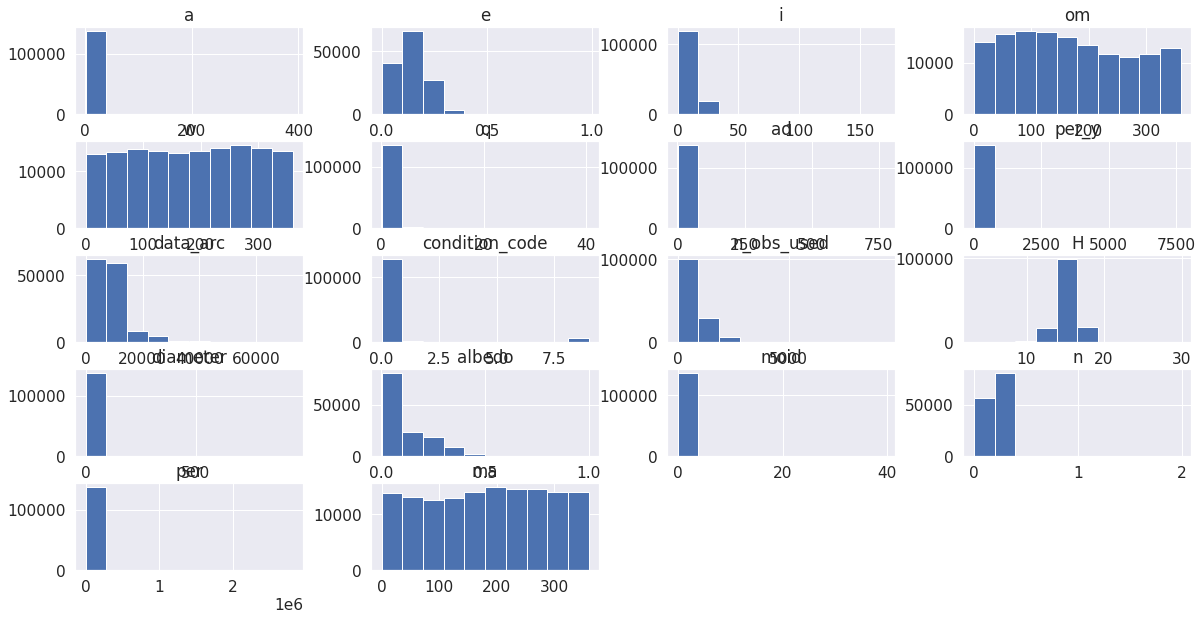

In [133]:
train.hist(figsize=(20,10));
plt.show;

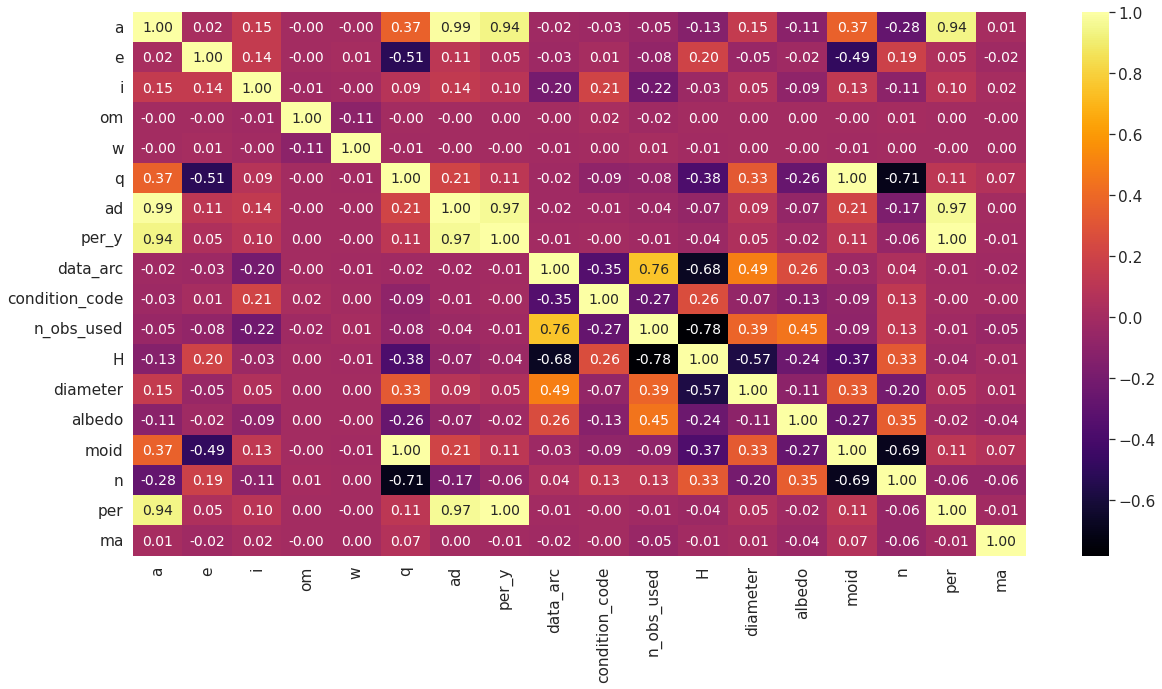

In [134]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});

**Week 2**

This week I am thinking for firstly filling the missing data values and then splitting the train set to multiple sets for training and testing and whichever set would give the best results, that would be finally applied to initial test set which has missing diameter values. 

The splitting of train dataset would allow us to check the accuracy of our model which would be at last applied to test set.

One more observation is that among the initial train and test dataset, most of the albedo values are there in train dataset, i.e., one that has the diameter value but these are not available in test dataset.
Therefore, I am dropping albedo column from test dataset and filling those in train dataset.


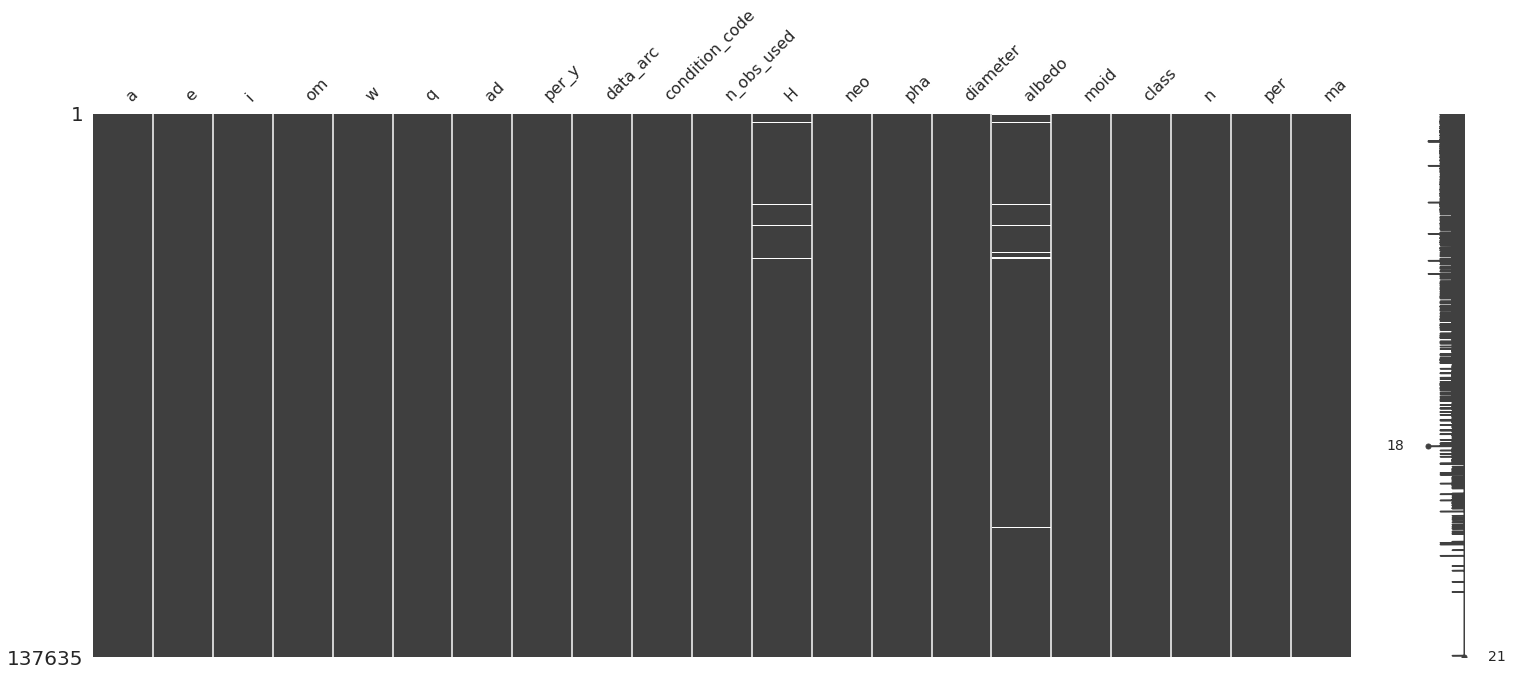

In [135]:
import missingno as msno
msno.matrix(train)

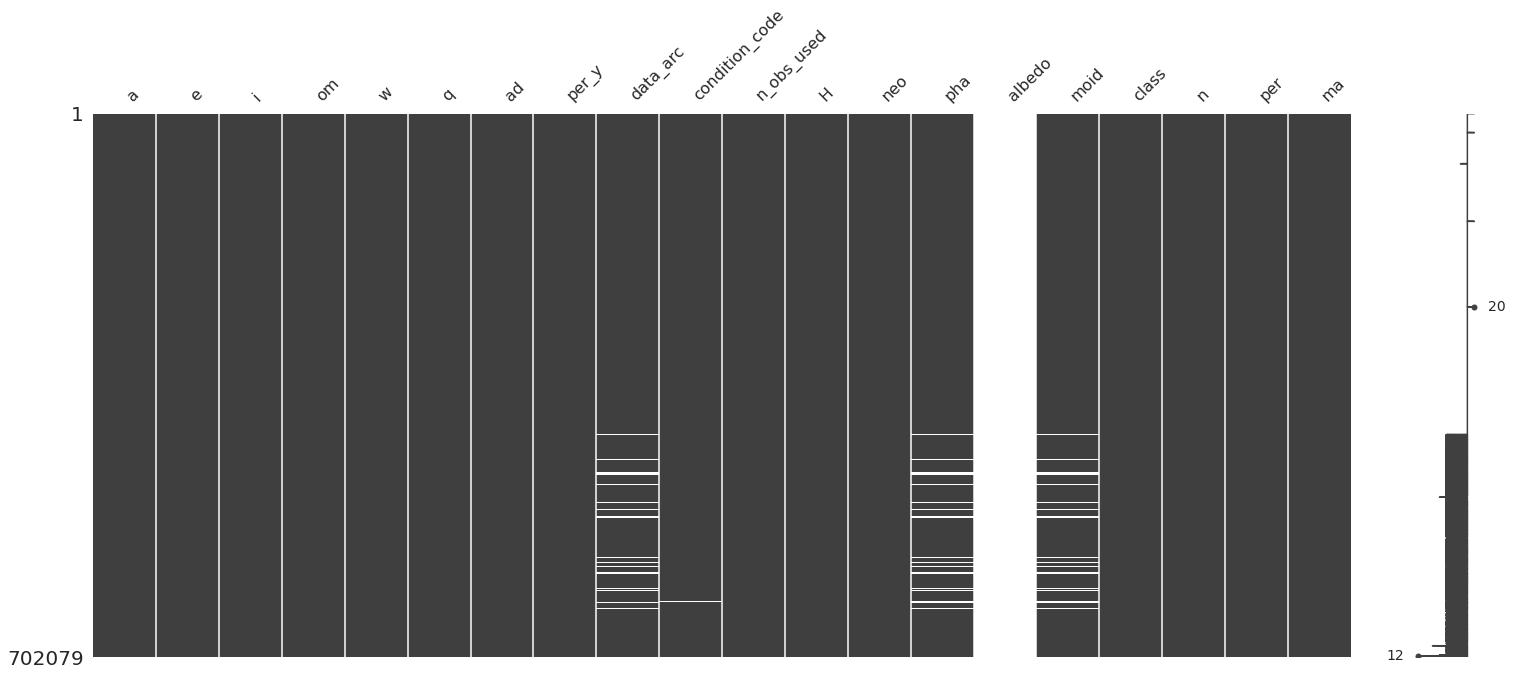

In [136]:
msno.matrix(test)

In [137]:
train[train.isnull().any(axis=1)]

a         e          i          om           w         q  \
0       1.028876  0.144621   1.321926   76.871027   88.835789  0.880078   
12      1.232902  0.201841   1.481034   84.366318  209.367143  0.984051   
33      1.144725  0.165373  10.184903   13.840344  210.480738  0.955419   
135     2.334151  0.540333  22.685818   59.882263  261.998869  1.072933   
152     0.955111  0.212988  24.930547  286.771701  103.702436  0.751684   
...          ...       ...        ...         ...         ...       ...   
114520  3.122127  0.077371  18.802028  107.199057  318.330849  2.880566   
115695  2.725979  0.641439  13.834715  133.622676  166.783740  0.977429   
118516  3.994207  0.121237  13.536379  356.255358  177.746010  3.509963   
121087  3.117854  0.118436  16.436326  121.469113  264.888956  2.748586   
137220  2.768577  0.203625   9.804561  263.026877  152.746640  2.204825   

              ad     per_y  data_arc  condition_code  ...       H  neo pha  \
0       1.177673  1.043645       3.0               3  ...  29.900    Y   N   
12      1.481753  1.368993      11.0               3  ...  25.500    Y   N   
33      1.334031  1.224786       1.0               9  ...  24.300    Y   N   
135     3.595369  3.566166    2725.0               0  ...  19.600    Y   N   
152     1.158539  0.933446       3.0               9  ...  21.588    Y   N   
...          ...       ...       ...             ...  ...     ...  ...  ..   
114520  3.363688  5.516760    5379.0               0  ...  15.500    N   N   
115695  4.474529  4.500824   10146.0               0  ...  15.200    Y   Y   
118516  4.478451  7.982777    4627.0               0  ...  14.800    N   N   
121087  3.487121  5.505437    5394.0               0  ...  15.200    N   N   
137220  3.332328  4.606733   37255.0               0  ...   7.910    N   N   

       diameter  albedo      moid  class         n          per          ma  
0        0.0025     NaN  0.000875    APO  0.944408   381.191226  333.147651  
12       0.0300     NaN  0.002569    APO  0.719965   500.024573   71.543111  
33       0.0660     NaN  0.022618    APO  0.804734   447.352919  325.175095  
135      0.2370     NaN  0.311096    AMO  0.276383  1302.542134  164.776745  
152      0.2770     NaN  0.050145    ATE  1.055901   340.941209  112.053832  
...         ...     ...       ...    ...       ...          ...         ...  
114520   6.8460     NaN  1.919100    MBA  0.178660  2014.996492   74.879525  
115695   7.0000     NaN  0.024720    APO  0.218988  1643.926043  150.363031  
118516   7.4310     NaN  2.515460    OMB  0.123469  2915.709192  101.733895  
121087   7.9070     NaN  1.812540    MBA  0.179028  2010.860927  315.972123  
137220  76.0000     NaN  1.221830    MBA  0.213953  1682.609189  312.433630  

[1631 rows x 21 columns]

In [138]:
test=test.drop(['albedo'],axis=1)

In [139]:
test[test.isnull().any(axis=1)]

a         e          i          om           w          q  \
64580   39.445070  0.250249  17.089001  110.376958  112.597142  29.573992   
414462   2.166590  0.251290   4.791051  134.716240  280.783776   1.622147   
414463   2.320689  0.138111   6.546884  273.880391  129.985035   2.000175   
414464   2.904675  0.253684  13.139290  322.997330   64.837530   2.167804   
414484   3.167181  0.048582  16.482330  149.240580   82.297640   3.013314   
...           ...       ...        ...         ...         ...        ...   
702018   2.627871  0.420862  29.177090  109.675470  287.393740   1.521901   
702019   1.849876  0.288448  38.061350   50.427330   77.306420   1.316284   
702020   1.866257  0.095386  20.492160  315.986990  228.850600   1.688243   
702021   2.316856  0.317692  12.207320  173.081890  143.079090   1.580809   
702041   3.122732  0.431624  21.515500  316.003450  102.895360   1.774887   

               ad       per_y  data_arc condition_code  n_obs_used      H neo  \
64580   49.316148  247.740662   33102.0            NaN        4379  -0.76   N   
414462   2.711033    3.189138       4.0            9.0           3    NaN   N   
414463   2.641202    3.535359      31.0            7.0           3    NaN   N   
414464   3.641545    4.950561      27.0            NaN           3  12.00   N   
414484   3.321047    5.636603       NaN            0.0          49  16.40   N   
...           ...         ...       ...            ...         ...    ...  ..   
702018   3.733842    4.260046       4.0            NaN          13  17.60   N   
702019   2.383469    2.516067       3.0            NaN          20  19.80   N   
702020   2.044272    2.549562       NaN              0          33  18.80   N   
702021   3.052904    3.526605       NaN              2          22  18.90   N   
702041   4.470577    5.518364       2.0            NaN          11  17.90   N   

        pha       moid class         n           per          ma  
64580     N  28.603100   TNO  0.003978  90487.276930   25.247190  
414462    N   0.641866   MCA  0.309057   1164.832516  342.513856  
414463    N   1.016490   MBA  0.278791   1291.289789  189.426476  
414464  NaN        NaN   MBA  0.199094   1808.192559  324.193410  
414484  NaN        NaN   MBA  0.174862   2058.769285   16.335850  
...     ...        ...   ...       ...           ...         ...  
702018  NaN        NaN   MCA  0.231365   1555.981962   18.069460  
702019  NaN        NaN   MCA  0.391733    918.993552  316.476310  
702020  NaN        NaN   IMB  0.386587    931.227456  139.959020  
702021  NaN        NaN   MCA  0.279483   1288.092472    2.458750  
702041  NaN        NaN   MBA  0.178608   2015.582355  353.275630  

[18671 rows x 19 columns]

We can observe that we have 3 columns with missing values in train dataset out of which one is albedo.
In test dataset we have 12 columns with missing values.

Out of the 12 columns we have 4 columns which have highly missing values

data_arc - approx 20K missing values

condition_code - approx 8K missing values

pha - approx 20K missing values

moid - approx 20K missing values

Out of these pha and moid have exactly the same number of missing values. 
Also, by reading about these terms I think that they are heavily correlated and the rows where moid is missing pha is also missing.

Since 20K is comparitively a smaller while dealing with around 7 lakh datapoints in test dataset. So dropping these values.

(PS:- I have mentioned about the terms earlier)

In [140]:
test=test.dropna(subset = ['moid'])

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685637 entries, 0 to 702078
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               685635 non-null  float64
 1   e               685637 non-null  float64
 2   i               685637 non-null  float64
 3   om              685637 non-null  float64
 4   w               685637 non-null  float64
 5   q               685637 non-null  float64
 6   ad              685631 non-null  float64
 7   per_y           685636 non-null  float64
 8   data_arc        685365 non-null  float64
 9   condition_code  685624 non-null  object 
 10  n_obs_used      685637 non-null  int64  
 11  H               683696 non-null  float64
 12  neo             685631 non-null  object 
 13  pha             685637 non-null  object 
 14  moid            685637 non-null  float64
 15  class           685637 non-null  object 
 16  n               685635 non-null  float64
 17  per       

In [142]:
test.isnull().sum()

a                    2
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   6
per_y                1
data_arc           272
condition_code      13
n_obs_used           0
H                 1941
neo                  6
pha                  0
moid                 0
class                0
n                    2
per                  6
ma                   8
dtype: int64

As soon as we delete moid, pha missing value also goes to 0. Hence, we were correct with our assumption that pha and moid are together missing.

Also missing values of data_arc comes down to 272 from previously around 20K and condition_code to 13 from previously around 8K.
But, H remains unaffected.

In [143]:
train.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [144]:
train.nunique()

a                 137623
e                 137610
i                 137632
om                137631
w                 137635
q                 137626
ad                137620
per_y             137631
data_arc           18600
condition_code        10
n_obs_used          3132
H                    762
neo                    2
pha                    2
diameter           16604
albedo              1056
moid               94824
class                 11
n                 137552
per               137623
ma                137634
dtype: int64

In [145]:
test.nunique()

a                 685423
e                 684750
i                 685599
om                685588
w                 685591
q                 685453
ad                685497
per_y             685550
data_arc           16240
condition_code        20
n_obs_used          2299
H                   9400
neo                    2
pha                    2
moid              275915
class                 14
n                 683838
per               685375
ma                685598
dtype: int64

We have to convert neo, pha and class to numerical form and also seeing no of unique values we can group condition_code and class

Dealing with condition_code

In [146]:
train['condition_code'].unique()


array([3, 8, 7, 0, 6, 4, 9, 5, 1, 2])

In [147]:
test['condition_code'].unique()


array([0, 2, 1, 4, 3, 5, nan, 8.0, 9.0, 7.0, 6.0, '0', '1', '5', '6', '9',
       '2', '8', '7', '4', '3'], dtype=object)

In [148]:
train['condition_code'].value_counts()

0    128212
9      6506
1      1373
2       396
5       333
7       207
6       188
4       176
3       167
8        77
Name: condition_code, dtype: int64

In [149]:
test['condition_code'].value_counts()

0      422941
0       75413
5       21530
9       20518
1       20113
6       18956
7       17058
8       16574
4       15412
2       14263
3        9290
1        9073
9.0      4142
6.0      3746
2        3568
7.0      3227
5        3178
8.0      3168
3        1744
4        1710
Name: condition_code, dtype: int64

We see that in test case some values are repeating like 9 and 9.0


In [150]:
test.condition_code = pd.to_numeric(test.condition_code, errors='coerce')

In [151]:
test['condition_code'].value_counts()

0.0    498354
1.0     29186
5.0     24708
9.0     24660
6.0     22702
7.0     20285
8.0     19742
2.0     17831
4.0     17122
3.0     11034
Name: condition_code, dtype: int64

In [152]:
train.condition_code = pd.to_numeric(train.condition_code, errors='coerce')

In [153]:
train['condition_code'].value_counts()

0    128212
9      6506
1      1373
2       396
5       333
7       207
6       188
4       176
3       167
8        77
Name: condition_code, dtype: int64

Now condition_code is converted to values between 0 and 9

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            137635 non-null  float64
 17  class     

In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685637 entries, 0 to 702078
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               685635 non-null  float64
 1   e               685637 non-null  float64
 2   i               685637 non-null  float64
 3   om              685637 non-null  float64
 4   w               685637 non-null  float64
 5   q               685637 non-null  float64
 6   ad              685631 non-null  float64
 7   per_y           685636 non-null  float64
 8   data_arc        685365 non-null  float64
 9   condition_code  685624 non-null  float64
 10  n_obs_used      685637 non-null  int64  
 11  H               683696 non-null  float64
 12  neo             685631 non-null  object 
 13  pha             685637 non-null  object 
 14  moid            685637 non-null  float64
 15  class           685637 non-null  object 
 16  n               685635 non-null  float64
 17  per       

Dealing with class

In [156]:
train['class'].value_counts()

MBA    126389
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [157]:
test['class'].value_counts()

MBA    605584
MCA     16760
OMB     16753
IMB     16740
APO     11272
AMO      7751
TJN      5443
TNO      3292
ATE      1506
CEN       434
AST        76
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [158]:
class_group = train.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})
print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.074593   3.8340  0.6000  939.400    8.253750     68.124387  126389
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

Class has relation with diameter as the value of class has properties assosciated with it which can be read from the link
https://pdssbn.astro.umd.edu/data_other/objclass.shtml 


In [159]:
train['class'].value_counts(normalize=True)*100

MBA    91.829113
OMB     5.456461
TJN     1.361572
IMB     0.427217
APO     0.353108
MCA     0.257929
AMO     0.195444
ATE     0.069023
CEN     0.035601
TNO     0.009445
AST     0.005086
Name: class, dtype: float64

In [160]:
test['class'].value_counts(normalize=True)*100

MBA    88.324288
MCA     2.444442
OMB     2.443421
IMB     2.441525
APO     1.644019
AMO     1.130482
TJN     0.793860
TNO     0.480137
ATE     0.219650
CEN     0.063299
AST     0.011085
IEO     0.002917
HYA     0.000583
PAA     0.000292
Name: class, dtype: float64

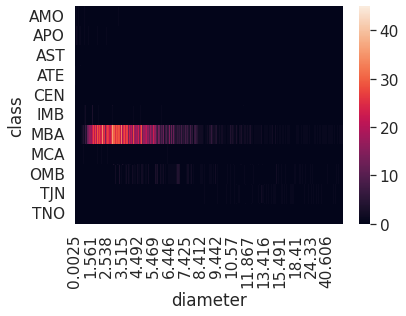

In [161]:
sns.heatmap(pd.crosstab(train['class'],train.diameter))
plt.show()

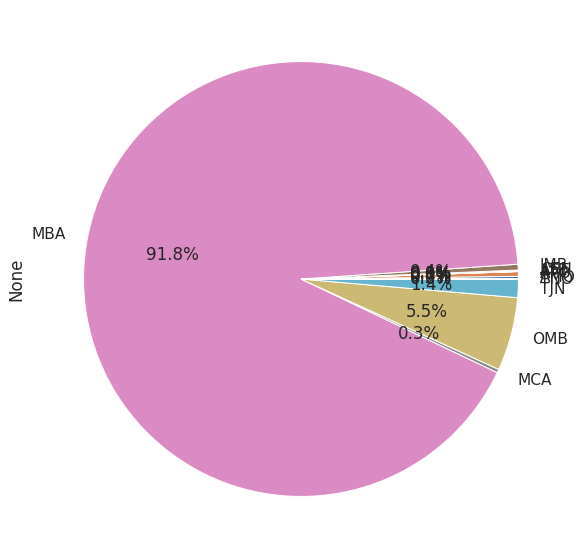

In [162]:
train.groupby('class').size().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',)
plt.show()

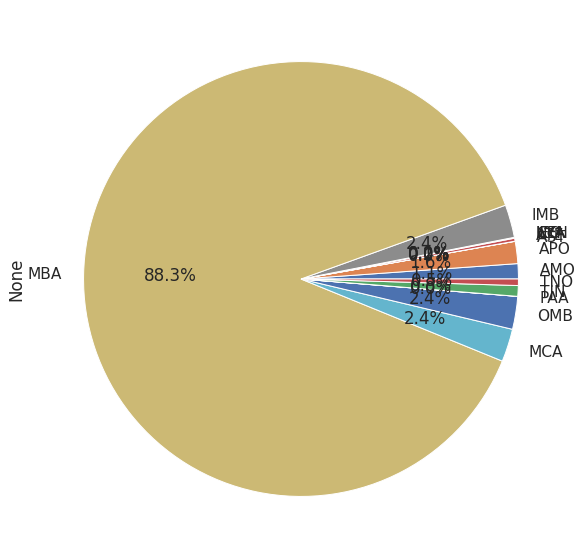

In [163]:
test.groupby('class').size().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%',)
plt.show()

In [164]:
train['class'].value_counts()

MBA    126389
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

We can see that while converting categorical data to numerical, we will face one problem that is neo of test dataset has 6 missing values. So we will first need to fill those before converting to numerical values.

In [165]:
print(pd.pivot_table(train, index = 'neo', columns = 'pha', 
                     values = 'e' ,aggfunc ='count'))

pha         N      Y
neo                 
N    136785.0    NaN
Y       629.0  221.0


In [166]:
print(pd.pivot_table(test, index = 'neo', columns = 'pha', 
                     values = 'e' ,aggfunc ='count'))

pha         N       Y
neo                  
N    665082.0     NaN
Y     18755.0  1794.0


Inference is that whenever pha is Y then neo will always be Y

In [167]:
test[test['neo'].isnull()]

a         e           i          om           w         q  \
687133      -1.272345  1.201134  122.741706   24.596910  241.810536  0.255912   
687271   -7770.004256  1.000826  142.636401  276.230222  326.001880  6.417550   
699052 -104279.220900  1.000056  138.380218  130.468071  287.870052  5.858483   
700695            NaN  1.000000   89.826795  300.387873   59.801951  8.828361   
700858            NaN  1.000000  155.720291   42.337498   55.893065  4.997530   
701719   -3562.472775  1.001016  113.525939    2.699366  181.618473  3.618257   

        ad  per_y  data_arc  condition_code  n_obs_used        H  neo pha  \
687133 NaN    NaN      80.0             NaN         207  22.0800  NaN   N   
687271 NaN    0.0     798.0             NaN         415  10.6440  NaN   N   
699052 NaN    0.0     201.0             NaN          21  13.4340  NaN   N   
700695 NaN    0.0     111.0             NaN          71   9.5996  NaN   N   
700858 NaN    0.0      67.0             NaN         102  12.7600  NaN   N   
701719 NaN    0.0      18.0             NaN          40  10.4200  NaN   N   

            moid class             n  per         ma  
687133  0.095821   HYA  6.867469e-01  NaN  51.157620  
687271  5.464480   HYA  1.440000e-06  NaN  -0.000358  
699052  5.116310   HYA  2.930000e-08  NaN   0.000011  
700695  8.276200   PAA           NaN  NaN        NaN  
700858  4.063860   PAA           NaN  NaN        NaN  
701719  2.621050   HYA  4.640000e-06  NaN  -0.005810

We see that ad is NaN wherevere neo is NaN.
Also a has 2 NaN values both of which occur when ad, condition_code, neo and per are NaN

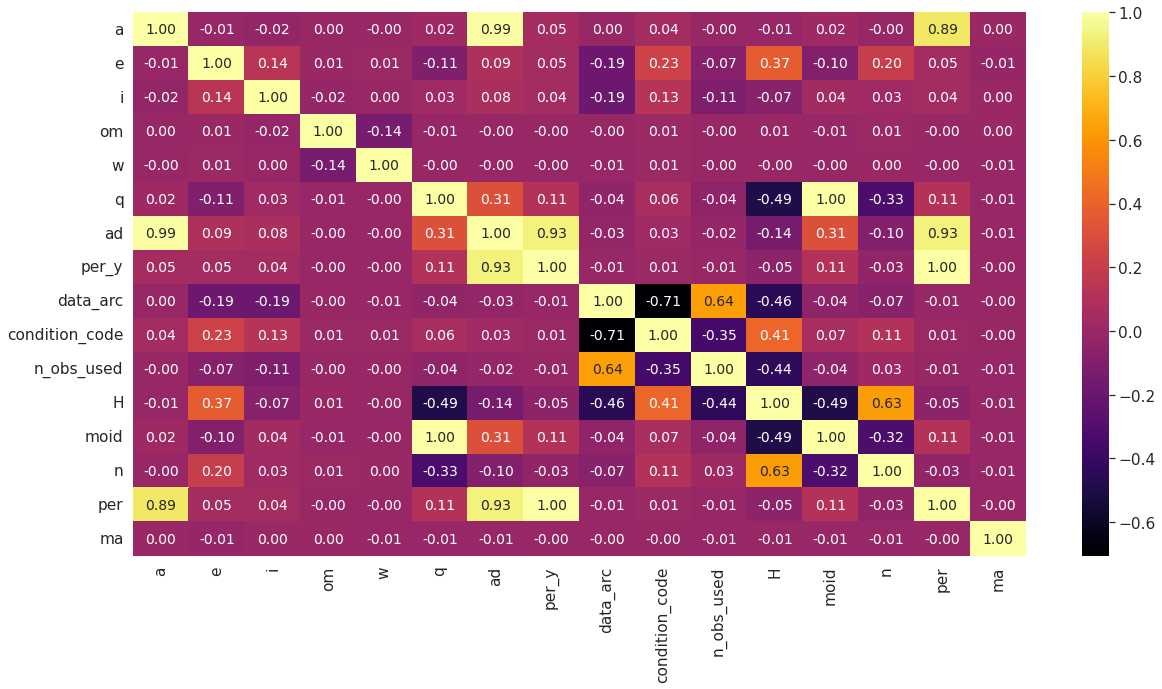

In [168]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(test.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});

We can see that per and ad are highly positively correlated while per and condition_code and ad and condition_code are no way correlated.
Since these are numerical data we can deal with this later on.

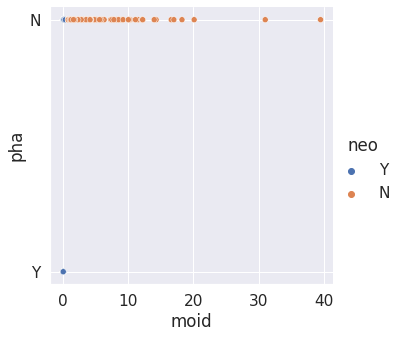

In [169]:
sns.relplot(data=train, x="moid", y="pha", hue="neo")

We see that large vales of moid that is moid >2 are maaking neo and pha set to N. 
We can use this to fill 6 rows of missing neo.
This also supports the dact that most rows which have pha = N also have neo = N

In [170]:
test.at[687133,'neo']='Y'

In [171]:
test[test['neo'].isnull()]

a         e           i          om           w         q  \
687271   -7770.004256  1.000826  142.636401  276.230222  326.001880  6.417550   
699052 -104279.220900  1.000056  138.380218  130.468071  287.870052  5.858483   
700695            NaN  1.000000   89.826795  300.387873   59.801951  8.828361   
700858            NaN  1.000000  155.720291   42.337498   55.893065  4.997530   
701719   -3562.472775  1.001016  113.525939    2.699366  181.618473  3.618257   

        ad  per_y  data_arc  condition_code  n_obs_used        H  neo pha  \
687271 NaN    0.0     798.0             NaN         415  10.6440  NaN   N   
699052 NaN    0.0     201.0             NaN          21  13.4340  NaN   N   
700695 NaN    0.0     111.0             NaN          71   9.5996  NaN   N   
700858 NaN    0.0      67.0             NaN         102  12.7600  NaN   N   
701719 NaN    0.0      18.0             NaN          40  10.4200  NaN   N   

           moid class             n  per        ma  
687271  5.46448   HYA  1.440000e-06  NaN -0.000358  
699052  5.11631   HYA  2.930000e-08  NaN  0.000011  
700695  8.27620   PAA           NaN  NaN       NaN  
700858  4.06386   PAA           NaN  NaN       NaN  
701719  2.62105   HYA  4.640000e-06  NaN -0.005810

In [172]:
test.at[687271,'neo']='N'
test.at[699052,'neo']='N'
test.at[700695,'neo']='N'
test.at[700858,'neo']='N'
test.at[701719,'neo']='N'


We could have easily done it with the help of code, but I wanted to try it manually once.

In [173]:
test[test['neo'].isnull()]

Empty DataFrame
Columns: [a, e, i, om, w, q, ad, per_y, data_arc, condition_code, n_obs_used, H, neo, pha, moid, class, n, per, ma]
Index: []

In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            137635 non-null  float64
 17  class     

In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685637 entries, 0 to 702078
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               685635 non-null  float64
 1   e               685637 non-null  float64
 2   i               685637 non-null  float64
 3   om              685637 non-null  float64
 4   w               685637 non-null  float64
 5   q               685637 non-null  float64
 6   ad              685631 non-null  float64
 7   per_y           685636 non-null  float64
 8   data_arc        685365 non-null  float64
 9   condition_code  685624 non-null  float64
 10  n_obs_used      685637 non-null  int64  
 11  H               683696 non-null  float64
 12  neo             685637 non-null  object 
 13  pha             685637 non-null  object 
 14  moid            685637 non-null  float64
 15  class           685637 non-null  object 
 16  n               685635 non-null  float64
 17  per       

All the object columns are now complete with no missing values left.
Hence, now we can convert these columns into numerical form.

Combining train and test dataset to change categorical data to numerical and also fill the missing values.

In [176]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

a         e         i          om           w         q        ad  \
0  1.028876  0.144621  1.321926   76.871027   88.835789  0.880078  1.177673   
1  1.447192  0.435651  0.458983  152.033180  314.574438  0.816721  2.077662   
2  1.401426  0.300327  3.533720  192.033456  335.403022  0.980541  1.822312   
3  1.214106  0.218542  0.314485  255.919407   36.856749  0.948773  1.479439   
4  1.579408  0.381353  5.716522    2.327029  214.166519  0.977096  2.181721   

      per_y  data_arc  condition_code  ...     H  neo pha diameter  albedo  \
0  1.043645       3.0             3.0  ...  29.9    Y   N   0.0025     NaN   
1  1.740994       7.0             8.0  ...  26.8    Y   N   0.0080   0.497   
2  1.659066      10.0             7.0  ...  27.3    Y   N   0.0080   0.326   
3  1.337806       3.0             8.0  ...  26.0    Y   N   0.0130   0.397   
4  1.984951       7.0             7.0  ...  26.1    Y   N   0.0150   0.287   

       moid  class         n         per          ma  
0  0.000875    APO  0.944408  381.191226  333.147651  
1  0.002754    APO  0.566129  635.898021   30.796013  
2  0.001372    APO  0.594085  605.973788  176.618145  
3  0.001253    APO  0.736748  488.633600  322.437088  
4  0.015294    APO  0.496549  725.003524  192.232616  

[5 rows x 21 columns]

In [177]:
combine.shape

(823272, 21)

In [178]:
from sklearn.preprocessing import OneHotEncoder
ohc=OneHotEncoder()
ohe=ohc.fit_transform(combine[['class']]).toarray()
combineOneHot=pd.DataFrame(ohe,columns=["class_"+str(ohc.categories_[0][i])
for i in range(len(ohc.categories_[0]))])
dfh=pd.concat([combine,combineOneHot],axis=1)
dfh

a         e          i          om           w         q  \
0       1.028876  0.144621   1.321926   76.871027   88.835789  0.880078   
1       1.447192  0.435651   0.458983  152.033180  314.574438  0.816721   
2       1.401426  0.300327   3.533720  192.033456  335.403022  0.980541   
3       1.214106  0.218542   0.314485  255.919407   36.856749  0.948773   
4       1.579408  0.381353   5.716522    2.327029  214.166519  0.977096   
...          ...       ...        ...         ...         ...       ...   
823267  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
823268  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
823269  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
823270  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
823271  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc  condition_code  ...  class_CEN  \
0       1.177673  1.043645       3.0             3.0  ...        0.0   
1       2.077662  1.740994       7.0             8.0  ...        0.0   
2       1.822312  1.659066      10.0             7.0  ...        0.0   
3       1.479439  1.337806       3.0             8.0  ...        0.0   
4       2.181721  1.984951       7.0             7.0  ...        0.0   
...          ...       ...       ...             ...  ...        ...   
823267  4.682676  4.717914   17298.0             0.0  ...        0.0   
823268  3.331350  4.302346      16.0             9.0  ...        0.0   
823269  2.852636  3.655884       5.0             9.0  ...        0.0   
823270  2.844376  3.398501      10.0             9.0  ...        0.0   
823271  3.278983  4.063580      11.0             9.0  ...        0.0   

        class_HYA class_IEO class_IMB  class_MBA  class_MCA  class_OMB  \
0             0.0       0.0       0.0        0.0        0.0        0.0   
1             0.0       0.0       0.0        0.0        0.0        0.0   
2             0.0       0.0       0.0        0.0        0.0        0.0   
3             0.0       0.0       0.0        0.0        0.0        0.0   
4             0.0       0.0       0.0        0.0        0.0        0.0   
...           ...       ...       ...        ...        ...        ...   
823267        0.0       0.0       0.0        0.0        0.0        0.0   
823268        0.0       0.0       0.0        1.0        0.0        0.0   
823269        0.0       0.0       0.0        1.0        0.0        0.0   
823270        0.0       0.0       0.0        1.0        0.0        0.0   
823271        0.0       0.0       0.0        1.0        0.0        0.0   

       class_PAA  class_TJN  class_TNO  
0            0.0        0.0        0.0  
1            0.0        0.0        0.0  
2            0.0        0.0        0.0  
3            0.0        0.0        0.0  
4            0.0        0.0        0.0  
...          ...        ...        ...  
823267       0.0        0.0        0.0  
823268       0.0        0.0        0.0  
823269       0.0        0.0        0.0  
823270       0.0        0.0        0.0  
823271       0.0        0.0        0.0  

[823272 rows x 35 columns]

In [179]:
combine=dfh

In [180]:
combine.shape

(823272, 35)

In [181]:
combine. drop('class', axis=1, inplace=True)

In [182]:
ohe=ohc.fit_transform(combine[['neo']]).toarray()
combineOneHot=pd.DataFrame(ohe,columns=["neo_"+str(ohc.categories_[0][i])
for i in range(len(ohc.categories_[0]))])
dfh=pd.concat([combine,combineOneHot],axis=1)
dfh

a         e          i          om           w         q  \
0       1.028876  0.144621   1.321926   76.871027   88.835789  0.880078   
1       1.447192  0.435651   0.458983  152.033180  314.574438  0.816721   
2       1.401426  0.300327   3.533720  192.033456  335.403022  0.980541   
3       1.214106  0.218542   0.314485  255.919407   36.856749  0.948773   
4       1.579408  0.381353   5.716522    2.327029  214.166519  0.977096   
...          ...       ...        ...         ...         ...       ...   
823267  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
823268  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
823269  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
823270  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
823271  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc  condition_code  ...  class_IEO  \
0       1.177673  1.043645       3.0             3.0  ...        0.0   
1       2.077662  1.740994       7.0             8.0  ...        0.0   
2       1.822312  1.659066      10.0             7.0  ...        0.0   
3       1.479439  1.337806       3.0             8.0  ...        0.0   
4       2.181721  1.984951       7.0             7.0  ...        0.0   
...          ...       ...       ...             ...  ...        ...   
823267  4.682676  4.717914   17298.0             0.0  ...        0.0   
823268  3.331350  4.302346      16.0             9.0  ...        0.0   
823269  2.852636  3.655884       5.0             9.0  ...        0.0   
823270  2.844376  3.398501      10.0             9.0  ...        0.0   
823271  3.278983  4.063580      11.0             9.0  ...        0.0   

        class_IMB class_MBA class_MCA  class_OMB  class_PAA  class_TJN  \
0             0.0       0.0       0.0        0.0        0.0        0.0   
1             0.0       0.0       0.0        0.0        0.0        0.0   
2             0.0       0.0       0.0        0.0        0.0        0.0   
3             0.0       0.0       0.0        0.0        0.0        0.0   
4             0.0       0.0       0.0        0.0        0.0        0.0   
...           ...       ...       ...        ...        ...        ...   
823267        0.0       0.0       0.0        0.0        0.0        0.0   
823268        0.0       1.0       0.0        0.0        0.0        0.0   
823269        0.0       1.0       0.0        0.0        0.0        0.0   
823270        0.0       1.0       0.0        0.0        0.0        0.0   
823271        0.0       1.0       0.0        0.0        0.0        0.0   

        class_TNO  neo_N  neo_Y  
0             0.0    0.0    1.0  
1             0.0    0.0    1.0  
2             0.0    0.0    1.0  
3             0.0    0.0    1.0  
4             0.0    0.0    1.0  
...           ...    ...    ...  
823267        0.0    0.0    1.0  
823268        0.0    1.0    0.0  
823269        0.0    1.0    0.0  
823270        0.0    1.0    0.0  
823271        0.0    1.0    0.0  

[823272 rows x 36 columns]

In [183]:
combine=dfh
combine.shape

(823272, 36)

In [184]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823272 entries, 0 to 823271
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823270 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823266 non-null  float64
 7   per_y           823271 non-null  float64
 8   data_arc        822862 non-null  float64
 9   condition_code  823259 non-null  float64
 10  n_obs_used      823272 non-null  int64  
 11  H               820584 non-null  float64
 12  neo             823272 non-null  object 
 13  pha             823272 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            823272 non-null  float64
 17  n         

In [185]:
combine. drop('neo', axis=1, inplace=True)

In [186]:
ohe=ohc.fit_transform(combine[['pha']]).toarray()
combineOneHot=pd.DataFrame(ohe,columns=["pha_"+str(ohc.categories_[0][i])
for i in range(len(ohc.categories_[0]))])
dfh=pd.concat([combine,combineOneHot],axis=1)
dfh

a         e          i          om           w         q  \
0       1.028876  0.144621   1.321926   76.871027   88.835789  0.880078   
1       1.447192  0.435651   0.458983  152.033180  314.574438  0.816721   
2       1.401426  0.300327   3.533720  192.033456  335.403022  0.980541   
3       1.214106  0.218542   0.314485  255.919407   36.856749  0.948773   
4       1.579408  0.381353   5.716522    2.327029  214.166519  0.977096   
...          ...       ...        ...         ...         ...       ...   
823267  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
823268  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
823269  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
823270  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
823271  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc  condition_code  ...  class_MBA  \
0       1.177673  1.043645       3.0             3.0  ...        0.0   
1       2.077662  1.740994       7.0             8.0  ...        0.0   
2       1.822312  1.659066      10.0             7.0  ...        0.0   
3       1.479439  1.337806       3.0             8.0  ...        0.0   
4       2.181721  1.984951       7.0             7.0  ...        0.0   
...          ...       ...       ...             ...  ...        ...   
823267  4.682676  4.717914   17298.0             0.0  ...        0.0   
823268  3.331350  4.302346      16.0             9.0  ...        1.0   
823269  2.852636  3.655884       5.0             9.0  ...        1.0   
823270  2.844376  3.398501      10.0             9.0  ...        1.0   
823271  3.278983  4.063580      11.0             9.0  ...        1.0   

        class_MCA class_OMB  class_PAA  class_TJN  class_TNO  neo_N  neo_Y  \
0             0.0       0.0        0.0        0.0        0.0    0.0    1.0   
1             0.0       0.0        0.0        0.0        0.0    0.0    1.0   
2             0.0       0.0        0.0        0.0        0.0    0.0    1.0   
3             0.0       0.0        0.0        0.0        0.0    0.0    1.0   
4             0.0       0.0        0.0        0.0        0.0    0.0    1.0   
...           ...       ...        ...        ...        ...    ...    ...   
823267        0.0       0.0        0.0        0.0        0.0    0.0    1.0   
823268        0.0       0.0        0.0        0.0        0.0    1.0    0.0   
823269        0.0       0.0        0.0        0.0        0.0    1.0    0.0   
823270        0.0       0.0        0.0        0.0        0.0    1.0    0.0   
823271        0.0       0.0        0.0        0.0        0.0    1.0    0.0   

        pha_N  pha_Y  
0         1.0    0.0  
1         1.0    0.0  
2         1.0    0.0  
3         1.0    0.0  
4         1.0    0.0  
...       ...    ...  
823267    0.0    1.0  
823268    1.0    0.0  
823269    1.0    0.0  
823270    1.0    0.0  
823271    1.0    0.0  

[823272 rows x 37 columns]

In [187]:
combine=dfh
combine. drop('pha', axis=1, inplace=True)
combine.shape

(823272, 36)

In [188]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823272 entries, 0 to 823271
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823270 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823266 non-null  float64
 7   per_y           823271 non-null  float64
 8   data_arc        822862 non-null  float64
 9   condition_code  823259 non-null  float64
 10  n_obs_used      823272 non-null  int64  
 11  H               820584 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          136405 non-null  float64
 14  moid            823272 non-null  float64
 15  n               823270 non-null  float64
 16  per             823266 non-null  float64
 17  ma        

In [189]:
combine['n_obs_used'] = combine['n_obs_used'].astype(float)


In [190]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823272 entries, 0 to 823271
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823270 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823266 non-null  float64
 7   per_y           823271 non-null  float64
 8   data_arc        822862 non-null  float64
 9   condition_code  823259 non-null  float64
 10  n_obs_used      823272 non-null  float64
 11  H               820584 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          136405 non-null  float64
 14  moid            823272 non-null  float64
 15  n               823270 non-null  float64
 16  per             823266 non-null  float64
 17  ma        

Now all the data types are there in float format

Now, I would be using KNNImputer to fill missing data values and then split this train and test dataset.

In [191]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
non_null_cols=['e','i','om','w','q','n_obs_used','moid','class_AMO','class_APO','class_AST','class_ATE','class_CEN','class_HYA','class_IEO','class_IMB','class_MBA','class_MCA','class_OMB','class_PAA','class_TJN','class_TNO','neo_N','neo_Y','pha_N','pha_Y']
combine[non_null_cols+['a']] = imputer.fit_transform(combine[non_null_cols+['a']])
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823272 entries, 0 to 823271
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823272 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823266 non-null  float64
 7   per_y           823271 non-null  float64
 8   data_arc        822862 non-null  float64
 9   condition_code  823259 non-null  float64
 10  n_obs_used      823272 non-null  float64
 11  H               820584 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          136405 non-null  float64
 14  moid            823272 non-null  float64
 15  n               823270 non-null  float64
 16  per             823266 non-null  float64
 17  ma        

In [192]:
non_null_cols.append('a')

In [193]:
combine[non_null_cols+['per_y']] = imputer.fit_transform(combine[non_null_cols+['per_y']])
non_null_cols.append('per_y')

In [194]:
combine[non_null_cols+['n']] = imputer.fit_transform(combine[non_null_cols+['n']])
non_null_cols.append('n')

In [195]:
non_null_cols

['e',
 'i',
 'om',
 'w',
 'q',
 'n_obs_used',
 'moid',
 'class_AMO',
 'class_APO',
 'class_AST',
 'class_ATE',
 'class_CEN',
 'class_HYA',
 'class_IEO',
 'class_IMB',
 'class_MBA',
 'class_MCA',
 'class_OMB',
 'class_PAA',
 'class_TJN',
 'class_TNO',
 'neo_N',
 'neo_Y',
 'pha_N',
 'pha_Y',
 'a',
 'per_y',
 'n']

In [196]:
combine[non_null_cols+['per']] = imputer.fit_transform(combine[non_null_cols+['per']])
non_null_cols.append('per')

In [197]:
combine[non_null_cols+['ad']] = imputer.fit_transform(combine[non_null_cols+['ad']])
non_null_cols.append('ad')

In [198]:
combine[non_null_cols+['ma']] = imputer.fit_transform(combine[non_null_cols+['ma']])
non_null_cols.append('ma')

In [199]:
combine[non_null_cols+['condition_code']] = imputer.fit_transform(combine[non_null_cols+['condition_code']])
non_null_cols.append('condition_code')

In [200]:
combine.isna().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             410
condition_code         0
n_obs_used             0
H                   2688
diameter          685637
albedo            686867
moid                   0
n                      0
per                    0
ma                     0
class_AMO              0
class_APO              0
class_AST              0
class_ATE              0
class_CEN              0
class_HYA              0
class_IEO              0
class_IMB              0
class_MBA              0
class_MCA              0
class_OMB              0
class_PAA              0
class_TJN              0
class_TNO              0
neo_N                  0
neo_Y                  0
pha_N                  0
pha_Y                  0
dtype: int64

In [201]:
combine[non_null_cols+['data_arc']] = imputer.fit_transform(combine[non_null_cols+['data_arc']])
non_null_cols.append('data_arc')

In [202]:
combine[non_null_cols+['H']] = imputer.fit_transform(combine[non_null_cols+['H']])
non_null_cols.append('H')

In [204]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823272 entries, 0 to 823271
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823272 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823272 non-null  float64
 7   per_y           823272 non-null  float64
 8   data_arc        823272 non-null  float64
 9   condition_code  823272 non-null  float64
 10  n_obs_used      823272 non-null  float64
 11  H               823272 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          136405 non-null  float64
 14  moid            823272 non-null  float64
 15  n               823272 non-null  float64
 16  per             823272 non-null  float64
 17  ma        

Now, that all the missing values are filled, we can separate back the train and test dataset.

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            137635 non-null  float64
 17  class     

In [206]:
train = combine[:len(train)]
test = combine[len(train):]

In [207]:
test = test.drop(['diameter','albedo'], axis = 1)

In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137635 non-null  float64
 9   condition_code  137635 non-null  float64
 10  n_obs_used      137635 non-null  float64
 11  H               137635 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          136405 non-null  float64
 14  moid            137635 non-null  float64
 15  n               137635 non-null  float64
 16  per             137635 non-null  float64
 17  ma        

In [209]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685637 entries, 137635 to 823271
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               685637 non-null  float64
 1   e               685637 non-null  float64
 2   i               685637 non-null  float64
 3   om              685637 non-null  float64
 4   w               685637 non-null  float64
 5   q               685637 non-null  float64
 6   ad              685637 non-null  float64
 7   per_y           685637 non-null  float64
 8   data_arc        685637 non-null  float64
 9   condition_code  685637 non-null  float64
 10  n_obs_used      685637 non-null  float64
 11  H               685637 non-null  float64
 12  moid            685637 non-null  float64
 13  n               685637 non-null  float64
 14  per             685637 non-null  float64
 15  ma              685637 non-null  float64
 16  class_AMO       685637 non-null  float64
 17  class

The test dataset that we have got we will not be using it till the end as this would be used to find diameter at the end of our project.

Till then for the modelling, we will split the train dataset and perform things on it.

But before that, we have to fill albedo and check outliers if any.

In [210]:
non_null_cols.append('diameter')
len(non_null_cols)

35

In [211]:
train[non_null_cols+['albedo']] = imputer.fit_transform(train[non_null_cols+['albedo']])

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137635 non-null  float64
 9   condition_code  137635 non-null  float64
 10  n_obs_used      137635 non-null  float64
 11  H               137635 non-null  float64
 12  diameter        137635 non-null  float64
 13  albedo          137635 non-null  float64
 14  moid            137635 non-null  float64
 15  n               137635 non-null  float64
 16  per             137635 non-null  float64
 17  ma        

Now, I would be removing those columns which are highly correlated with each other as they would not be useful for our model.

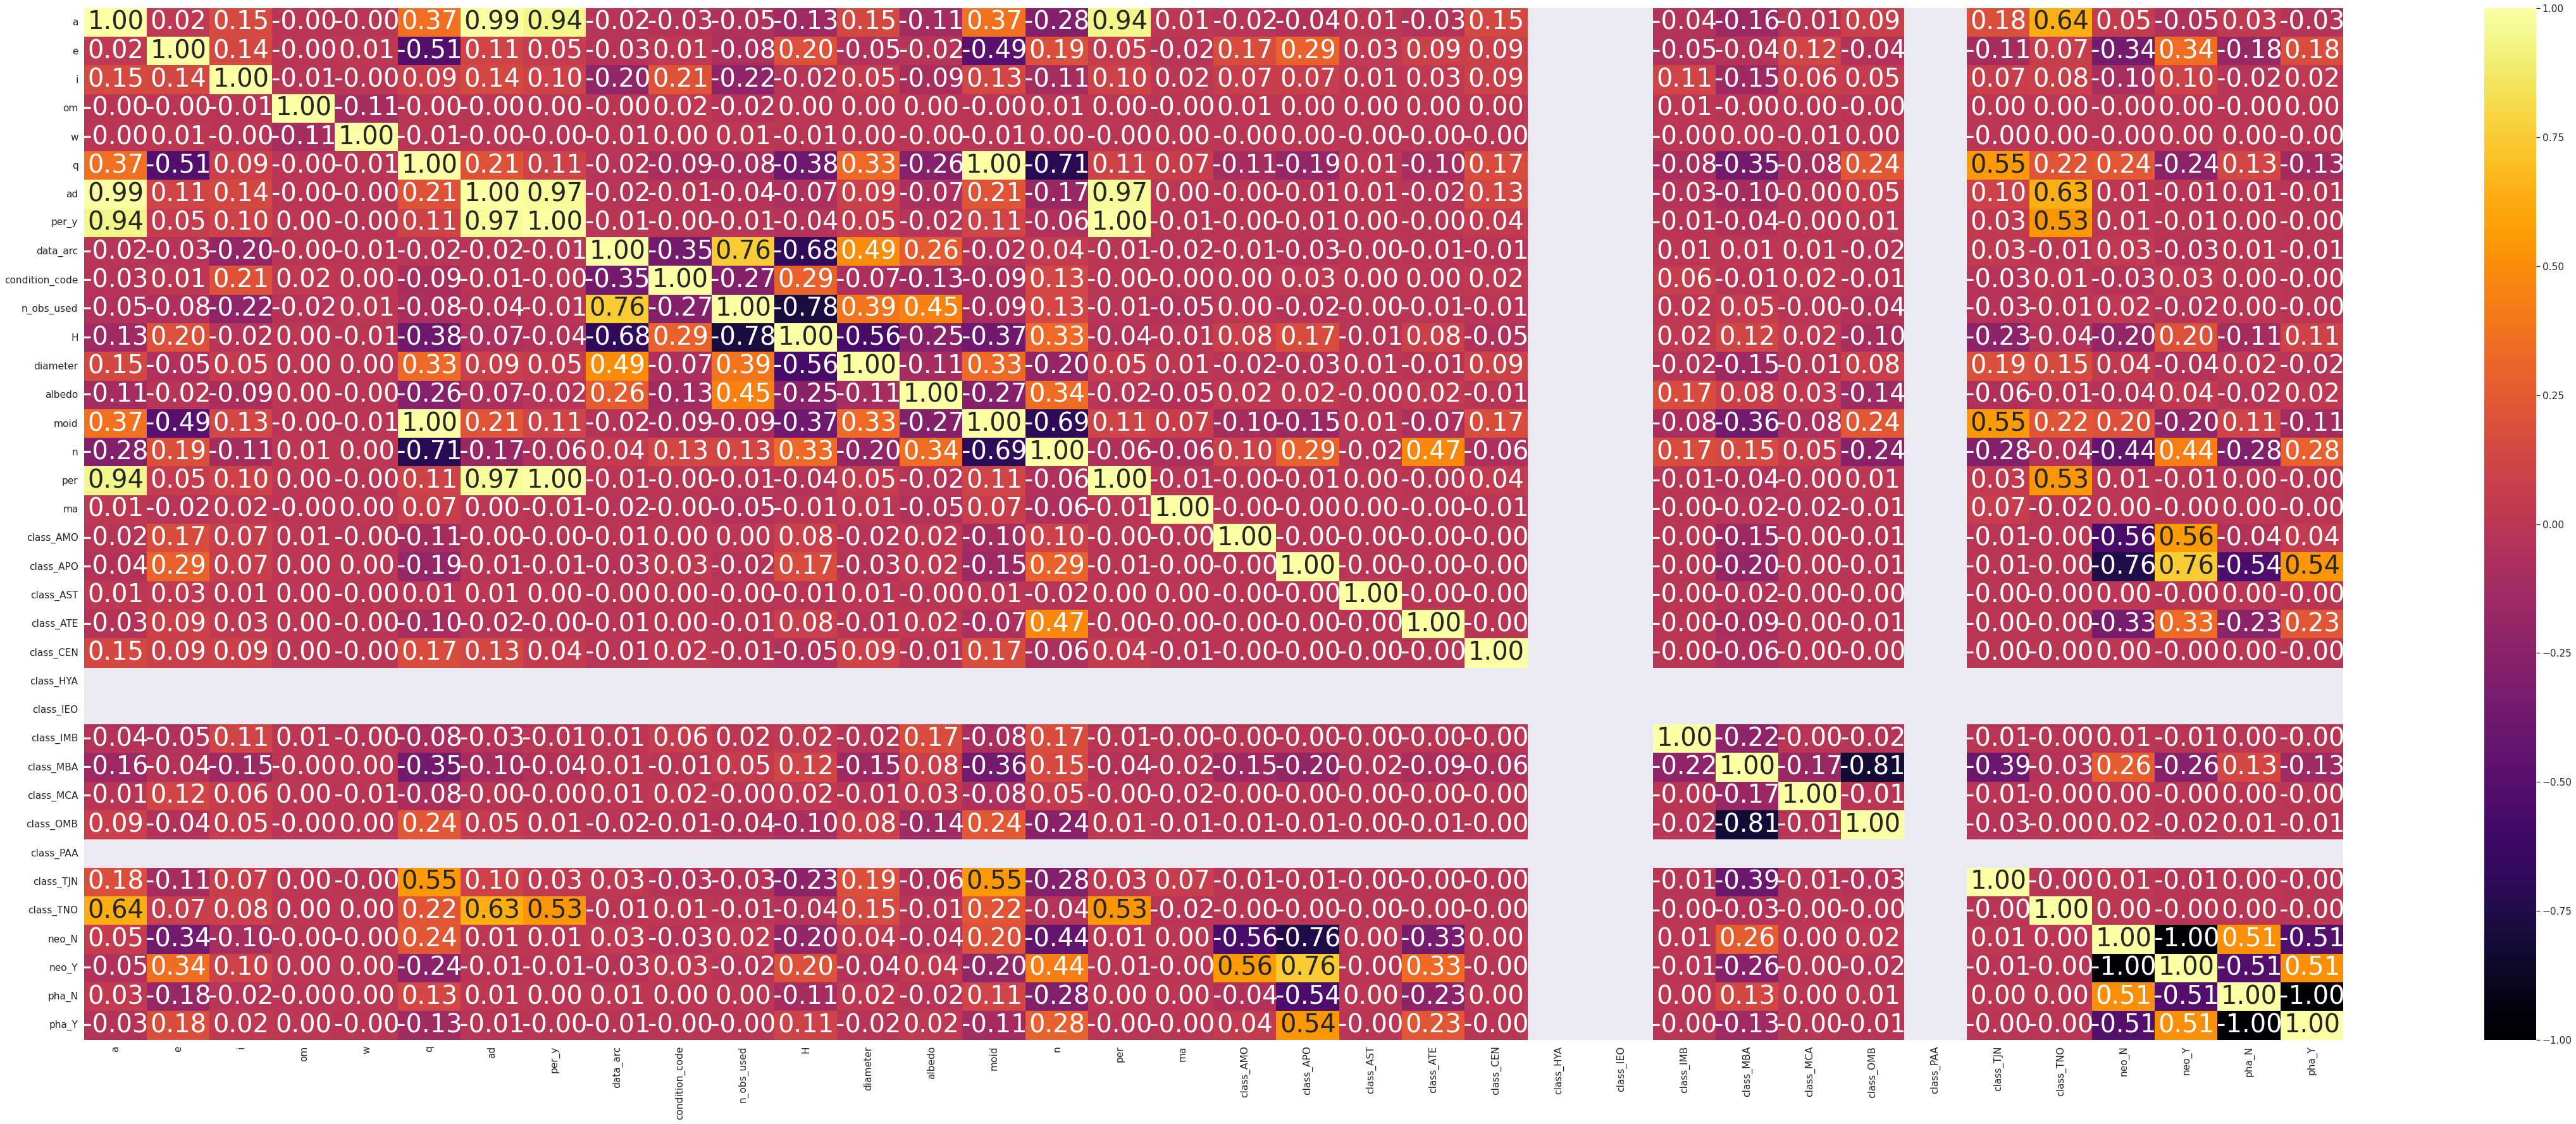

In [213]:
plt.figure(figsize=(80,30))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':40});

per_y and per are highly correlated with correlation coefficient = 1.
This can be also interpreted from their meaning as well.
Hence, dropping per_y

In [214]:
train = train.drop(['per_y'], axis = 1)

Now, we have a,ad and per that are hightly correlated. So out of these keeping only a and removing others.

In [215]:
train = train.drop(['ad','per'], axis = 1)

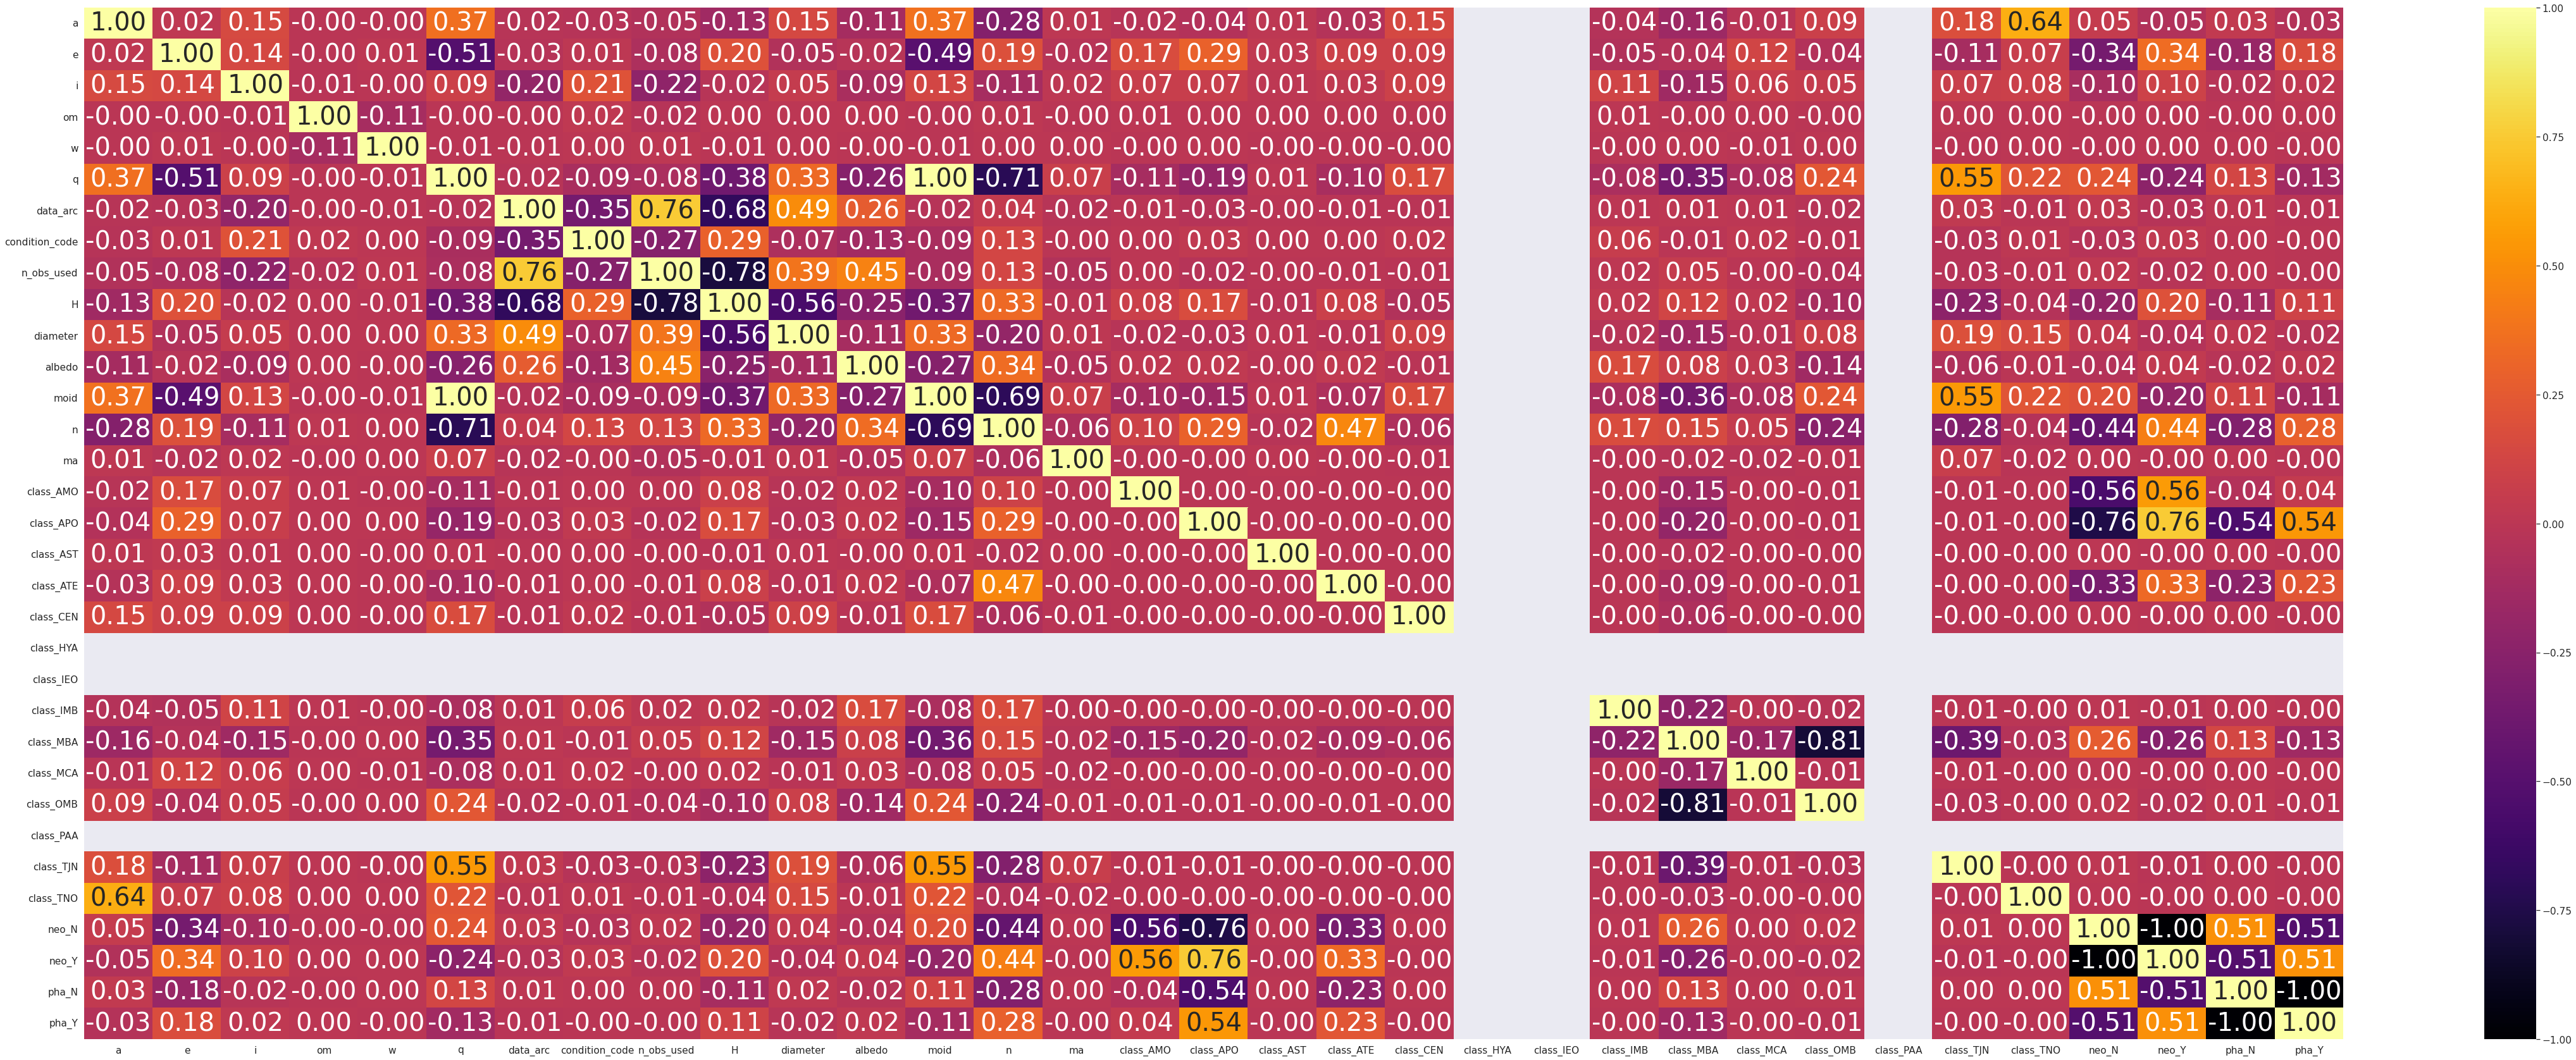

In [216]:
plt.figure(figsize=(80,30))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':40});

q and moid are also highly correlated and also connected to each other according to their meaning. so removing moid.

In [217]:
train = train.drop(['moid'], axis = 1)

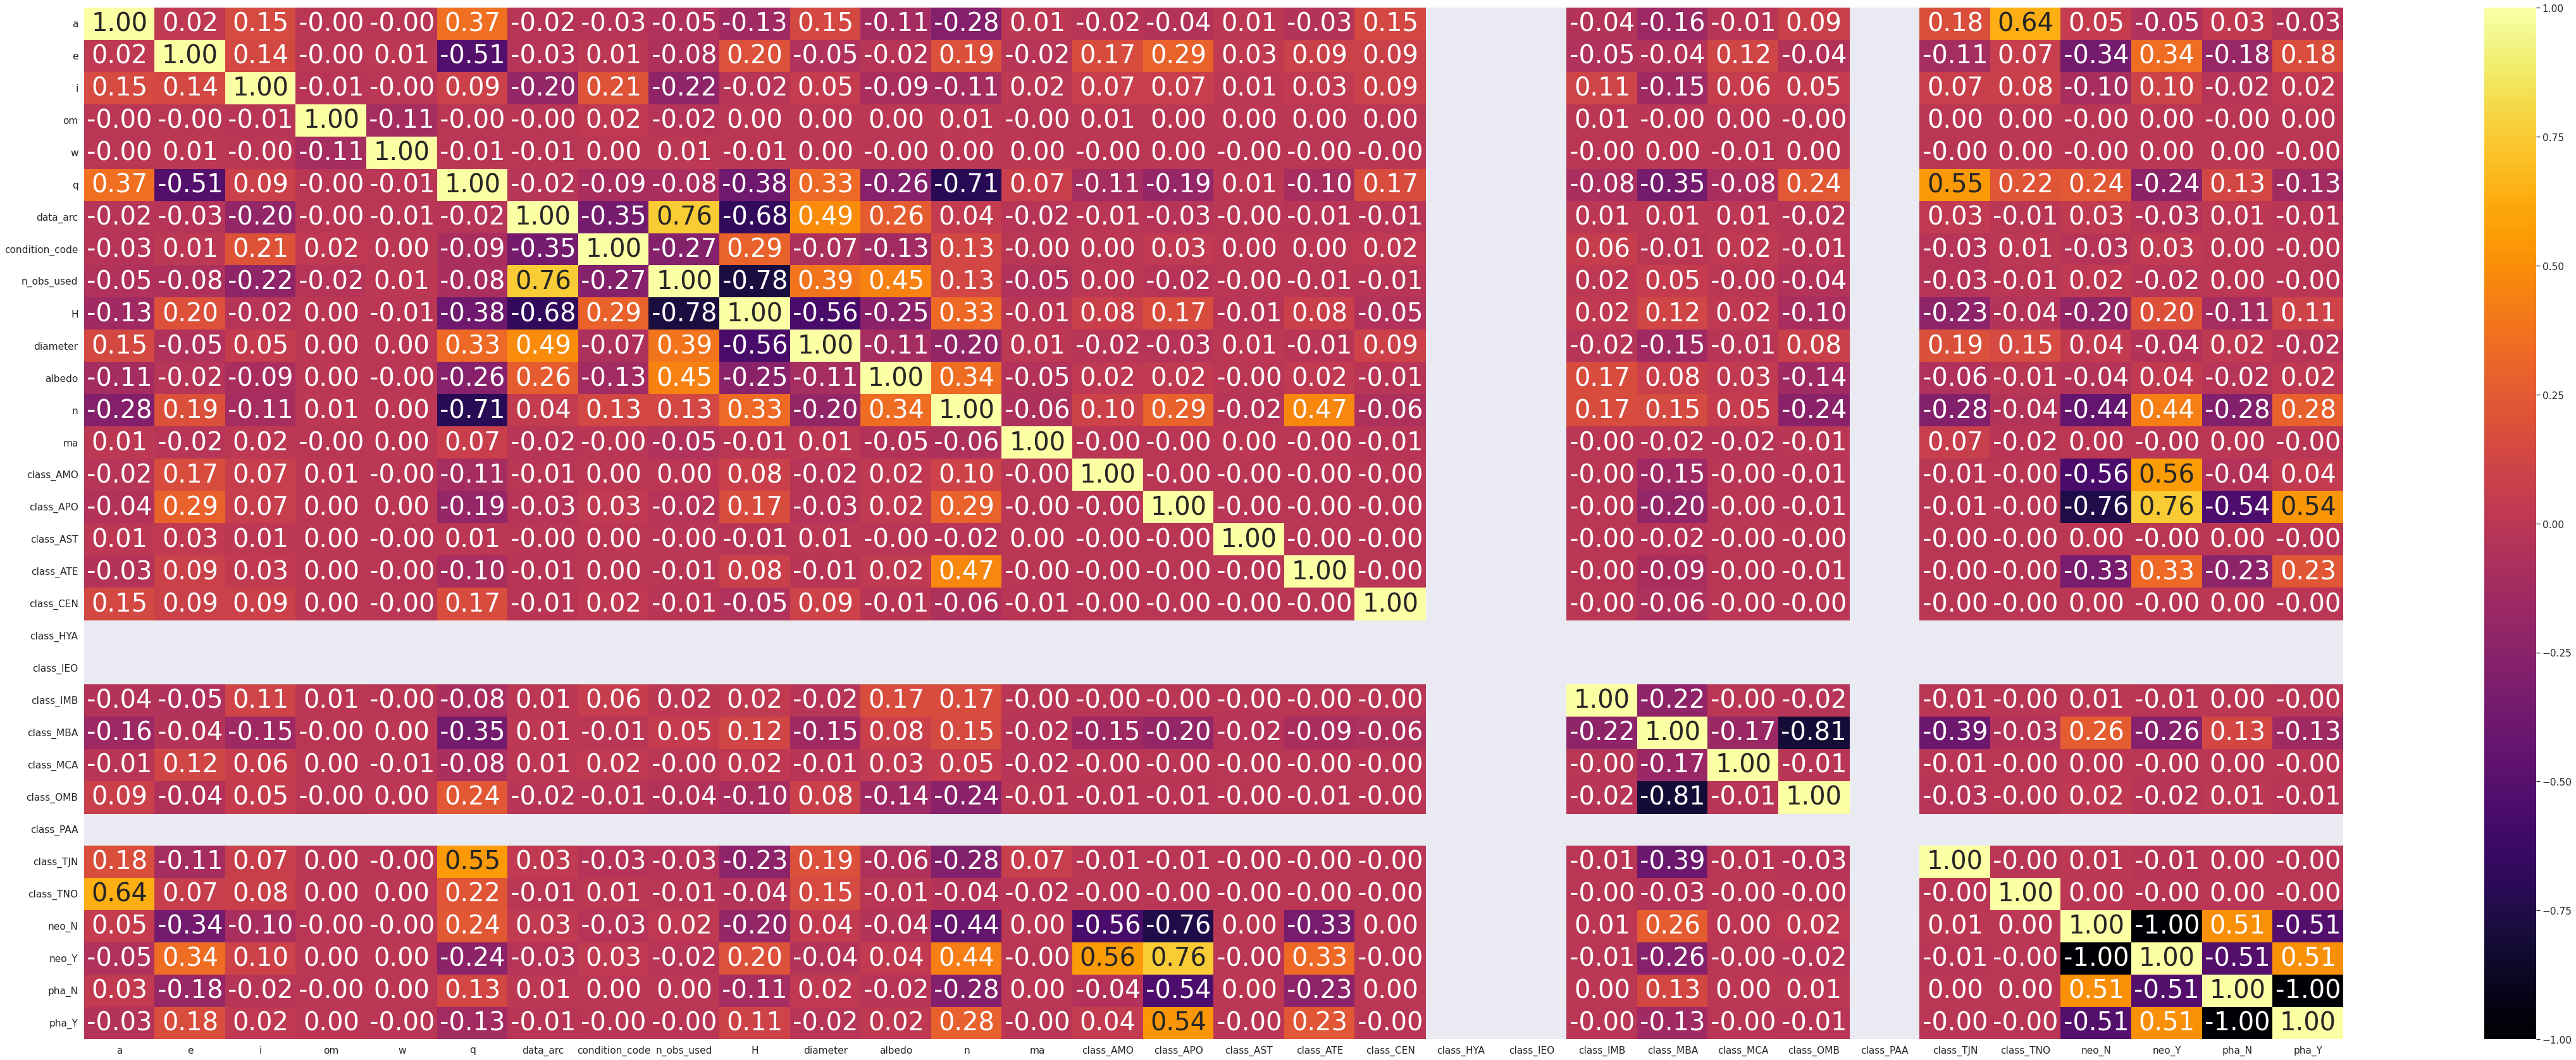

In [218]:
plt.figure(figsize=(80,30))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':40});

Other data's that are correlated are

neo_N and neo_Y

pha_N and pha_Y

But we are not removing them, as it would otherwise show hierarchy, which we don't want.

Now, checking for outliers

In [219]:
pd.set_option('display.max_columns', None)
train.describe(include='all',percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

a              e              i             om  \
count  137635.000000  137635.000000  137635.000000  137635.000000   
mean        2.814612       0.145485      10.349235     169.827772   
std         1.522745       0.077574       6.835108     102.713411   
min         0.626226       0.000489       0.021855       0.000738   
1%          2.044609       0.016218       0.869676       3.768102   
10%         2.309913       0.054525       2.844692      35.245567   
25%         2.536710       0.089622       5.120694      82.334464   
50%         2.750853       0.138543       9.390074     160.438501   
75%         3.092538       0.191141      13.738623     256.268890   
90%         3.177909       0.239748      19.460711     321.217519   
99%         5.179058       0.348405      29.002086     356.406344   
max       389.145964       0.984348     170.323647     359.990858   

                   w              q      data_arc  condition_code  \
count  137635.000000  137635.000000  137635.00000   137635.000000   
mean      181.904210       2.402608    8961.30857        0.485211   
std       103.556763       0.516171    6167.92834        1.966085   
min         0.004466       0.081882       1.00000        0.000000   
1%          3.777515       1.675322       1.00000        0.000000   
10%        37.618552       1.892318    4468.00000        0.000000   
25%        91.947794       2.068948    6289.00000        0.000000   
50%       183.668021       2.363884    7570.00000        0.000000   
75%       271.763348       2.685812    9726.00000        0.000000   
90%       323.756712       2.883950   15205.00000        0.000000   
99%       356.245364       4.719899   33525.90000        9.000000   
max       359.995174      40.465671   72684.00000        9.000000   

          n_obs_used              H       diameter         albedo  \
count  137635.000000  137635.000000  137635.000000  137635.000000   
mean      675.015468      15.192758       5.481626       0.129558   
std       595.919879       1.422465       9.366928       0.109681   
min         5.000000       3.200000       0.002500       0.001000   
1%          9.000000      10.900000       1.252340       0.025000   
10%        94.000000      13.500000       2.024000       0.040000   
25%       215.000000      14.400000       2.770000       0.053000   
50%       496.000000      15.300000       3.956000       0.078000   
75%       984.000000      16.100000       5.741500       0.187000   
90%      1538.000000      16.800000       8.611600       0.294000   
99%      2526.660000      18.100000      31.719820       0.465000   
max      9325.000000      29.900000     939.400000       1.000000   

                   n             ma      class_AMO      class_APO  \
count  137635.000000  137635.000000  137635.000000  137635.000000   
mean        0.219640     183.116021       0.001954       0.003531   
std         0.056980     103.411484       0.044166       0.059318   
min         0.000128       0.000517       0.000000       0.000000   
1%          0.083623       3.713143       0.000000       0.000000   
10%         0.173977      36.050539       0.000000       0.000000   
25%         0.181231      94.300733       0.000000       0.000000   
50%         0.216024     186.826029       0.000000       0.000000   
75%         0.243948     271.467660       0.000000       0.000000   
90%         0.280744     324.418530       0.000000       0.000000   
99%         0.337123     356.436253       0.000000       0.000000   
max         1.988877     359.999979       1.000000       1.000000   

           class_AST      class_ATE      class_CEN  class_HYA  class_IEO  \
count  137635.000000  137635.000000  137635.000000   137635.0   137635.0   
mean        0.000051       0.000690       0.000356        0.0        0.0   
std         0.007131       0.026263       0.018865        0.0        0.0   
min         0.000000       0.000000       0.000000        0.0        0.0   
1%          0.000000       0.000000       0.000

From percentile based menthod, we can see that we have outliers in the following columns

a, e, i, q, albedo, n

Let's check the graphs for these columns and then deal with the outliers.

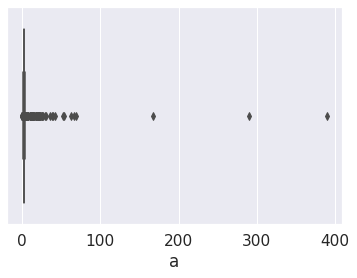

In [220]:
sns.boxplot(x=train['a'])


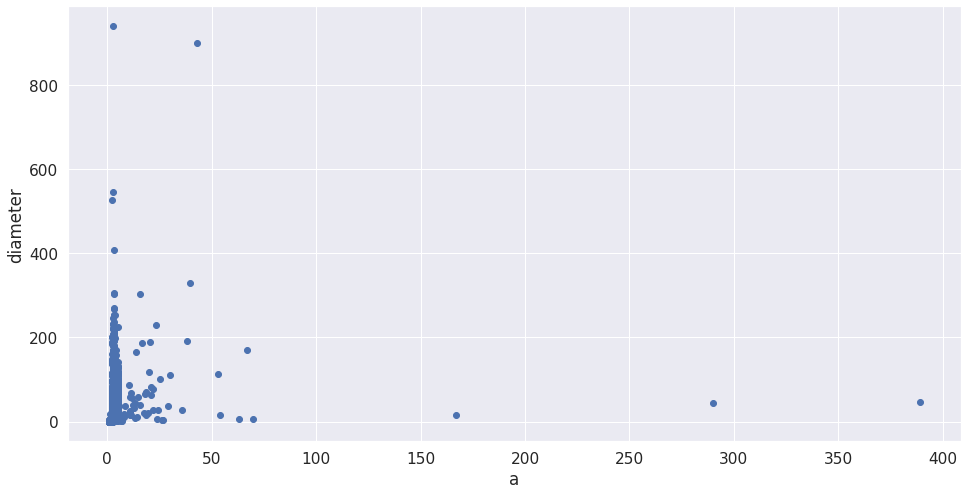

In [221]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['a'], train['diameter'])
ax.set_xlabel('a')
ax.set_ylabel('diameter')
plt.show()

Deleting rows with values of a above 99 percentile.

In [222]:
uc=train['a'].quantile(0.99)
lc=train['a'].quantile(0.01)
uc

5.17905842718

In [223]:
train.shape

(137635, 32)

In [224]:
train.drop(train.index[train['a']>uc],inplace=True)
train.drop(train.index[train['a']<lc],inplace=True)

In [225]:
train.shape

(134881, 32)

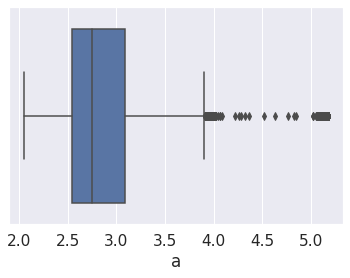

In [226]:
sns.boxplot(x=train['a'])


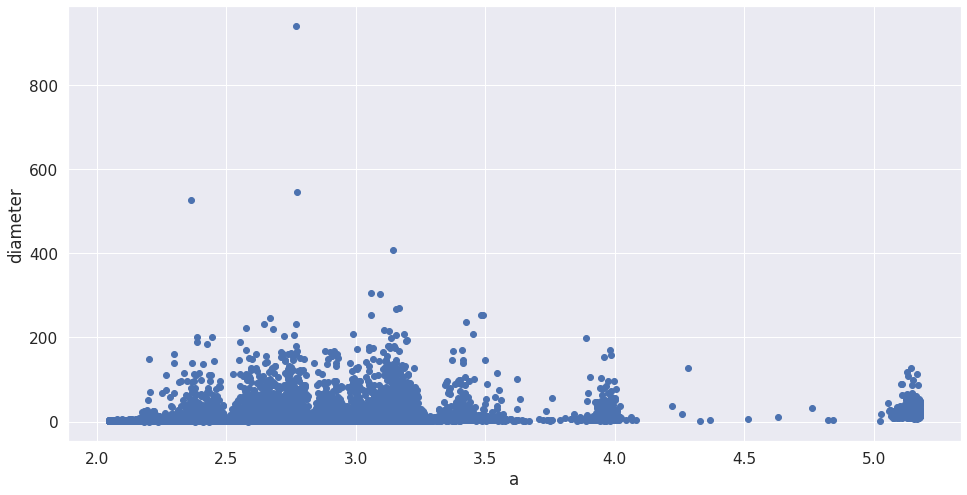

In [227]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['a'], train['diameter'])
ax.set_xlabel('a')
ax.set_ylabel('diameter')
plt.show()

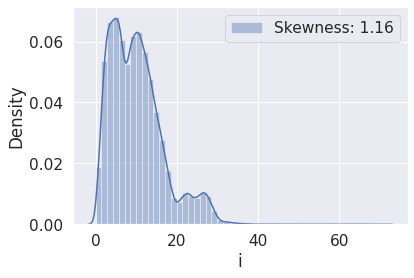

In [228]:
sns.distplot(train['i'], label = 'Skewness: %.2f'%(train['a'].skew()))
plt.legend(loc = 'best')

Now, we look for e

In [229]:
pd.set_option('display.max_columns', None)
train.describe(include='all',percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

a              e              i             om  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean        2.788102       0.145131      10.192014     169.689071   
std         0.369227       0.074347       6.569246     102.706217   
min         2.044619       0.000489       0.021855       0.000738   
1%          2.173589       0.016360       0.862570       3.762839   
10%         2.319792       0.055031       2.822195      35.200360   
25%         2.542698       0.090439       5.069032      82.238804   
50%         2.750853       0.139292       9.298323     160.184886   
75%         3.089209       0.191271      13.577110     256.067472   
90%         3.173250       0.238904      18.724005     321.173425   
99%         3.949944       0.333012      28.719593     356.395414   
max         5.179040       0.968381      71.178071     359.990858   

                   w              q       data_arc  condition_code  \
count  134881.000000  134881.000000  134881.000000   134881.000000   
mean      181.964445       2.386730    8967.427114        0.465840   
std       103.546215       0.401924    6150.103557        1.929105   
min         0.004466       0.081882       1.000000        0.000000   
1%          3.796406       1.707960       1.000000        0.000000   
10%        37.683463       1.903568    4522.000000        0.000000   
25%        92.008234       2.074267    6293.000000        0.000000   
50%       183.727954       2.364000    7572.000000        0.000000   
75%       271.821109       2.680437    9719.000000        0.000000   
90%       323.814196       2.870919   15182.000000        0.000000   
99%       356.248819       3.224325   33851.200000        9.000000   
max       359.995174       5.150398   72684.000000        9.000000   

          n_obs_used              H       diameter         albedo  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean      677.344778      15.200274       5.338804       0.128662   
std       595.025171       1.359463       8.634876       0.106657   
min         5.000000       3.200000       0.032000       0.001000   
1%          9.000000      11.058000       1.328800       0.025000   
10%        96.000000      13.600000       2.054000       0.040000   
25%       217.000000      14.500000       2.788000       0.053000   
50%       500.000000      15.300000       3.953000       0.078000   
75%       987.000000      16.100000       5.686000       0.187000   
90%      1540.000000      16.800000       8.308000       0.293000   
99%      2526.000000      18.000000      28.389200       0.452000   
max      9325.000000      23.697300     939.400000       1.000000   

                   n             ma      class_AMO      class_APO  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean        0.218280     182.606580       0.001127       0.001090   
std         0.041157     103.561567       0.033551       0.032995   
min         0.083624       0.000517       0.000000       0.000000   
1%          0.125550       3.687798       0.000000       0.000000   
10%         0.174360      35.805554       0.000000       0.000000   
25%         0.181524      93.520861       0.000000       0.000000   
50%         0.216024     185.872085       0.000000       0.000000   
75%         0.243087     271.178335       0.000000       0.000000   
90%         0.278953     324.608084       0.000000       0.000000   
99%         0.307566     356.454249       0.000000       0.000000   
max         0.337121     359.999979       1.000000       1.000000   

           class_AST  class_ATE  class_CEN  class_HYA  class_IEO  class_IMB  \
count  134881.000000   134881.0   134881.0   134881.0   134881.0   134881.0   
mean        0.000037        0.0        0.0        0.0        0.0        0.0   
std         0.006088        0.0        0.0        0.0        0.0        0.0   
min         0.000000        0.0        0.0        0.0        0.0        0.0   
1%          0.00000

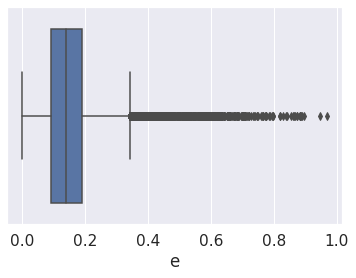

In [230]:
sns.boxplot(x=train['e'])


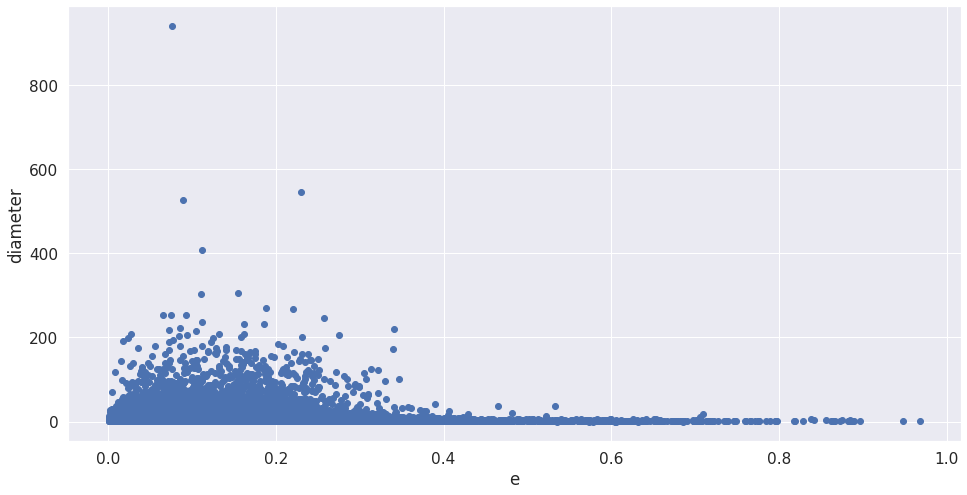

In [231]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['e'], train['diameter'])
ax.set_xlabel('e')
ax.set_ylabel('diameter')
plt.show()

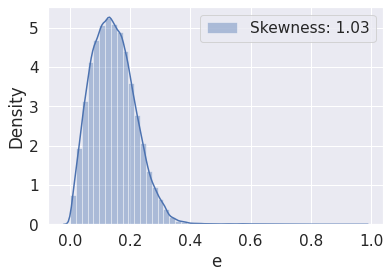

In [232]:
sns.distplot(train['e'], label = 'Skewness: %.2f'%(train['e'].skew()))
plt.legend(loc = 'best')

On closely looking at the graphs, not much skewness and outliers are observed for e. So we leave it as it is.

Let's now check for i

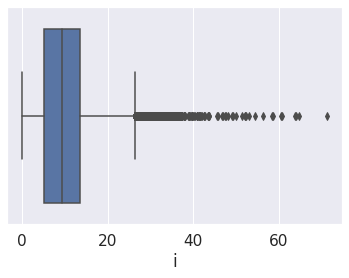

In [233]:
sns.boxplot(x=train['i'])


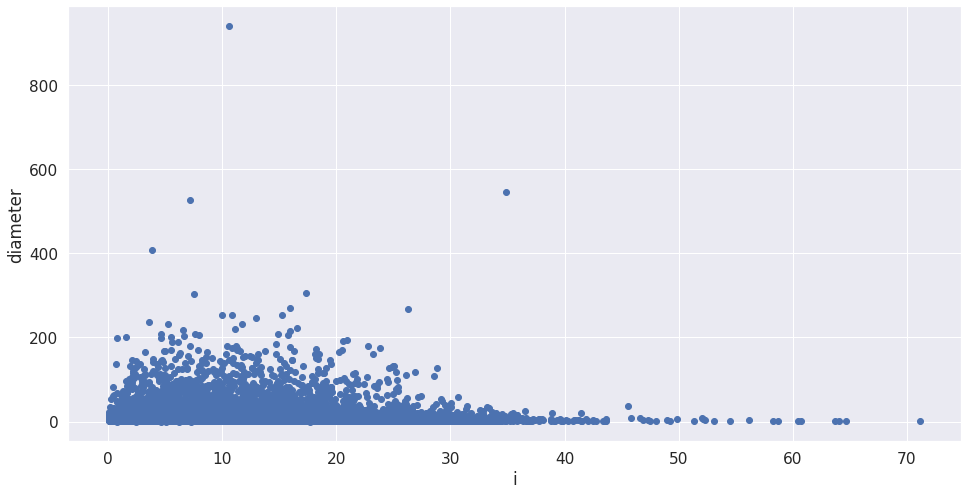

In [234]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['i'], train['diameter'])
ax.set_xlabel('i')
ax.set_ylabel('diameter')
plt.show()

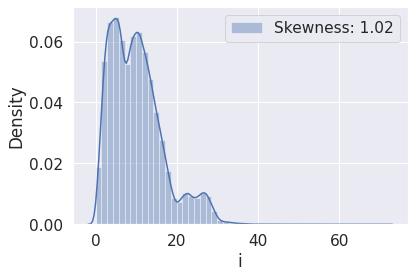

In [235]:
sns.distplot(train['i'], label = 'Skewness: %.2f'%(train['i'].skew()))
plt.legend(loc = 'best')

On closely looking at the graphs, not much skewness and outliers are observed for i. So we leave it as it is.




Let's check for q

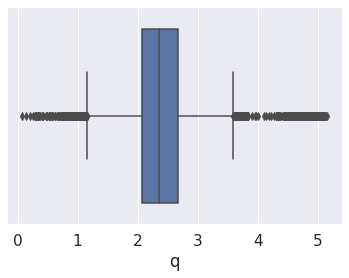

In [236]:
sns.boxplot(x=train['q'])

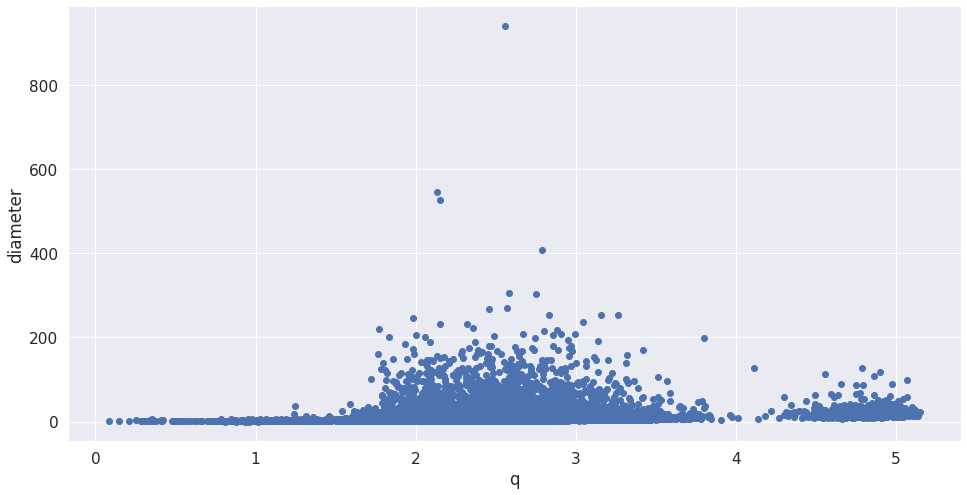

In [237]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['q'], train['diameter'])
ax.set_xlabel('q')
ax.set_ylabel('diameter')
plt.show()

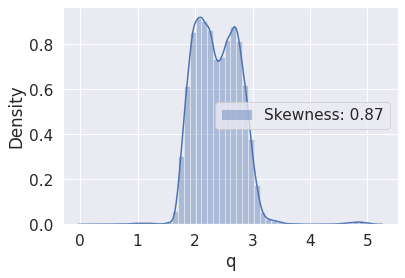

In [238]:
sns.distplot(train['q'], label = 'Skewness: %.2f'%(train['q'].skew()))
plt.legend(loc = 'best')

On closely looking at the graphs, not much skewness and outliers are observed for i. So we leave it as it is.

Not dealing with albedo currently, as https://cneos.jpl.nasa.gov/tools/ast_size_est.html this website has a relation between diameter with albedo and H.

Lets check for n

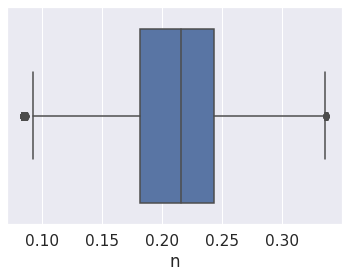

In [239]:
sns.boxplot(x=train['n'])

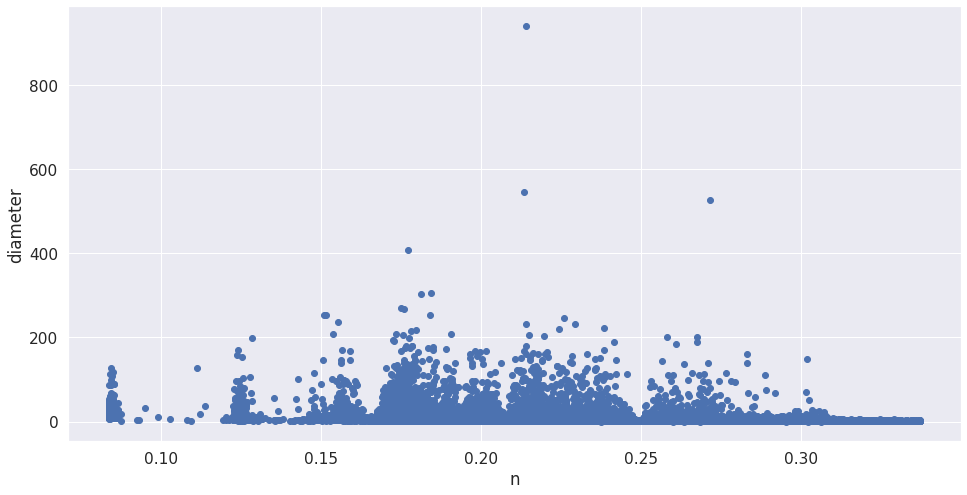

In [240]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['n'], train['diameter'])
ax.set_xlabel('n')
ax.set_ylabel('diameter')
plt.show()

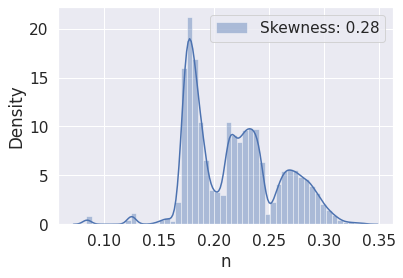

In [241]:
sns.distplot(train['n'], label = 'Skewness: %.2f'%(train['n'].skew()))
plt.legend(loc = 'best')

On closely looking at the graphs, not much skewness and outliers are observed for n. So we leave it as it is.

In [242]:
pd.set_option('display.max_columns', None)
train.describe(include='all',percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

a              e              i             om  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean        2.788102       0.145131      10.192014     169.689071   
std         0.369227       0.074347       6.569246     102.706217   
min         2.044619       0.000489       0.021855       0.000738   
1%          2.173589       0.016360       0.862570       3.762839   
10%         2.319792       0.055031       2.822195      35.200360   
25%         2.542698       0.090439       5.069032      82.238804   
50%         2.750853       0.139292       9.298323     160.184886   
75%         3.089209       0.191271      13.577110     256.067472   
90%         3.173250       0.238904      18.724005     321.173425   
99%         3.949944       0.333012      28.719593     356.395414   
max         5.179040       0.968381      71.178071     359.990858   

                   w              q       data_arc  condition_code  \
count  134881.000000  134881.000000  134881.000000   134881.000000   
mean      181.964445       2.386730    8967.427114        0.465840   
std       103.546215       0.401924    6150.103557        1.929105   
min         0.004466       0.081882       1.000000        0.000000   
1%          3.796406       1.707960       1.000000        0.000000   
10%        37.683463       1.903568    4522.000000        0.000000   
25%        92.008234       2.074267    6293.000000        0.000000   
50%       183.727954       2.364000    7572.000000        0.000000   
75%       271.821109       2.680437    9719.000000        0.000000   
90%       323.814196       2.870919   15182.000000        0.000000   
99%       356.248819       3.224325   33851.200000        9.000000   
max       359.995174       5.150398   72684.000000        9.000000   

          n_obs_used              H       diameter         albedo  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean      677.344778      15.200274       5.338804       0.128662   
std       595.025171       1.359463       8.634876       0.106657   
min         5.000000       3.200000       0.032000       0.001000   
1%          9.000000      11.058000       1.328800       0.025000   
10%        96.000000      13.600000       2.054000       0.040000   
25%       217.000000      14.500000       2.788000       0.053000   
50%       500.000000      15.300000       3.953000       0.078000   
75%       987.000000      16.100000       5.686000       0.187000   
90%      1540.000000      16.800000       8.308000       0.293000   
99%      2526.000000      18.000000      28.389200       0.452000   
max      9325.000000      23.697300     939.400000       1.000000   

                   n             ma      class_AMO      class_APO  \
count  134881.000000  134881.000000  134881.000000  134881.000000   
mean        0.218280     182.606580       0.001127       0.001090   
std         0.041157     103.561567       0.033551       0.032995   
min         0.083624       0.000517       0.000000       0.000000   
1%          0.125550       3.687798       0.000000       0.000000   
10%         0.174360      35.805554       0.000000       0.000000   
25%         0.181524      93.520861       0.000000       0.000000   
50%         0.216024     185.872085       0.000000       0.000000   
75%         0.243087     271.178335       0.000000       0.000000   
90%         0.278953     324.608084       0.000000       0.000000   
99%         0.307566     356.454249       0.000000       0.000000   
max         0.337121     359.999979       1.000000       1.000000   

           class_AST  class_ATE  class_CEN  class_HYA  class_IEO  class_IMB  \
count  134881.000000   134881.0   134881.0   134881.0   134881.0   134881.0   
mean        0.000037        0.0        0.0        0.0        0.0        0.0   
std         0.006088        0.0        0.0        0.0        0.0        0.0   
min         0.000000        0.0        0.0        0.0        0.0        0.0   
1%          0.00000

Let's check other column's skewness and it's relation with diameter also and if required deal with them.

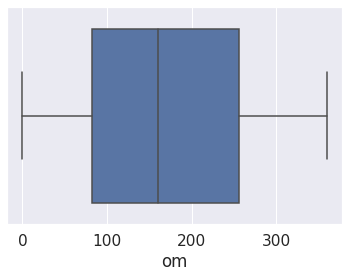

In [243]:
sns.boxplot(x=train['om'])


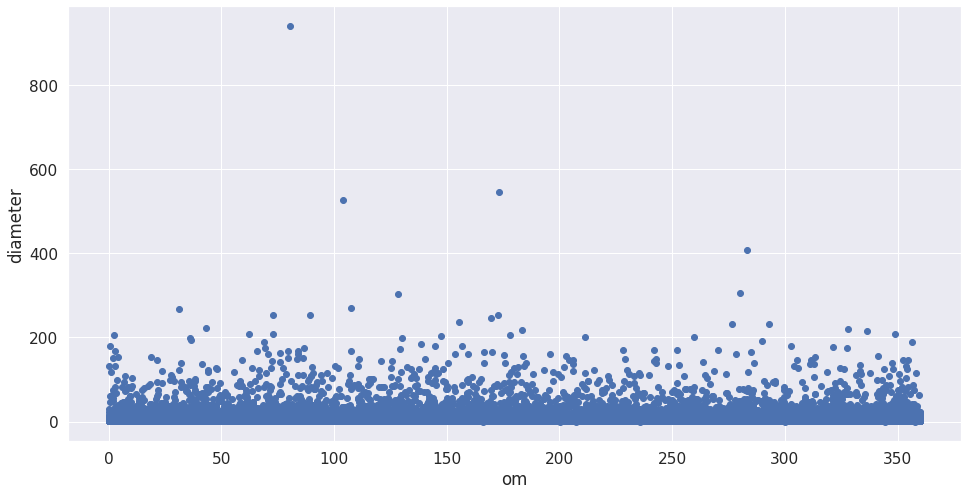

In [244]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['om'], train['diameter'])
ax.set_xlabel('om')
ax.set_ylabel('diameter')
plt.show()


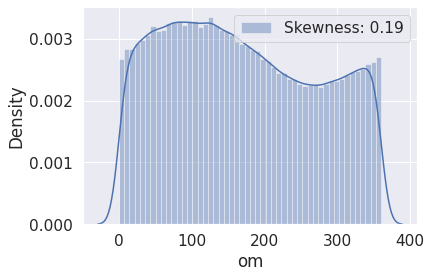

In [245]:
sns.distplot(train['om'], label = 'Skewness: %.2f'%(train['om'].skew()))
plt.legend(loc = 'best')


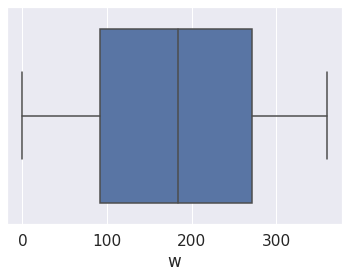

In [246]:
sns.boxplot(x=train['w'])

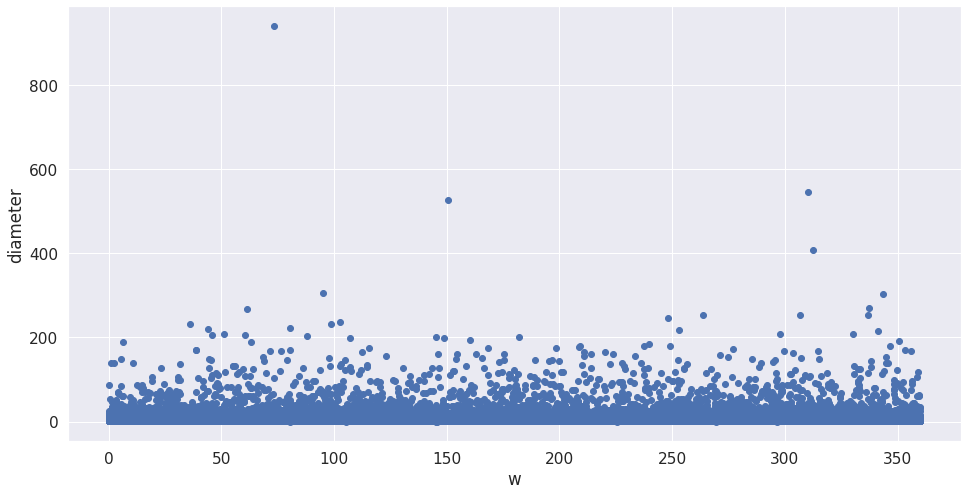

In [247]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['w'], train['diameter'])
ax.set_xlabel('w')
ax.set_ylabel('diameter')
plt.show()


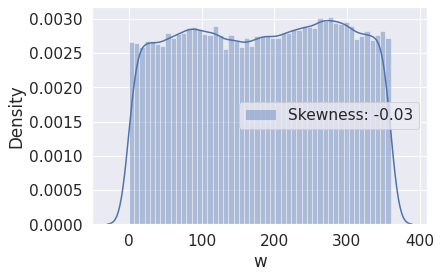

In [248]:
sns.distplot(train['w'], label = 'Skewness: %.2f'%(train['w'].skew()))
plt.legend(loc = 'best')

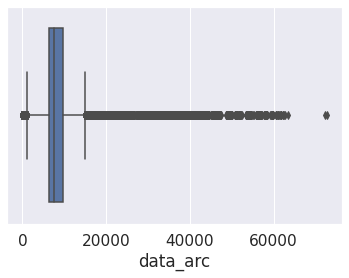

In [249]:
sns.boxplot(x=train['data_arc'])

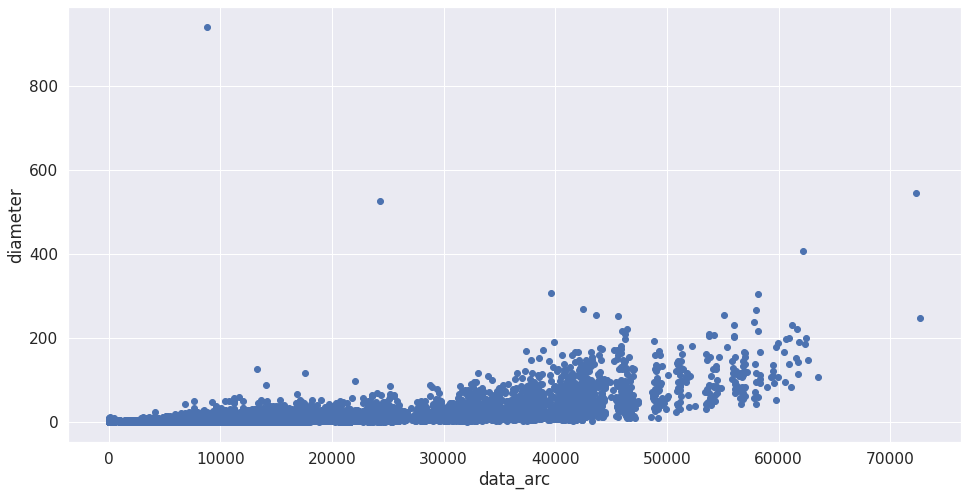

In [250]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['data_arc'], train['diameter'])
ax.set_xlabel('data_arc')
ax.set_ylabel('diameter')
plt.show()

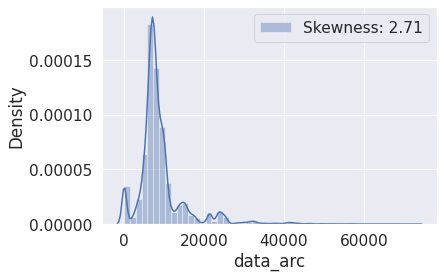

In [251]:
sns.distplot(train['data_arc'], label = 'Skewness: %.2f'%(train['data_arc'].skew()))
plt.legend(loc = 'best')

In [252]:
inp_array=train['data_arc']
inp_array

15           10.0
26           25.0
31           14.0
35           28.0
43           87.0
           ...   
137628    39658.0
137630    62175.0
137631    24288.0
137632    72318.0
137634     8822.0
Name: data_arc, Length: 134881, dtype: float64

In [255]:
out_array=np.sqrt(inp_array)
out_array

15          3.162278
26          5.000000
31          3.741657
35          5.291503
43          9.327379
             ...    
137628    199.143165
137630    249.349153
137631    155.846078
137632    268.920062
137634     93.925502
Name: data_arc, Length: 134881, dtype: float64

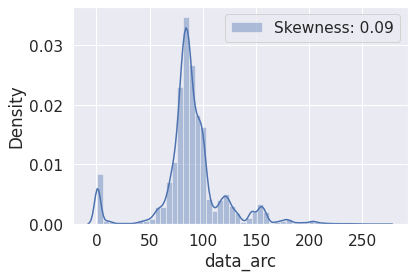

In [256]:
sns.distplot(out_array, label = 'Skewness: %.2f'%(out_array.skew()))
plt.legend(loc = 'best')

In [257]:
train['data_arc']=out_array

In [258]:
train.head()

a         e          i          om           w         q  data_arc  \
15  2.233986  0.578048   2.393483  235.563313  296.487915  0.942634  3.162278   
26  2.431534  0.604325   0.781588  344.280936  225.618402  0.962097  5.000000   
31  2.410801  0.606140  17.712704  299.859503  145.116152  0.949519  3.741657   
35  2.582433  0.685894   6.176442  357.495406  269.247685  0.811159  5.291503   
43  2.180614  0.535663   7.263548  200.375180  145.635460  1.012540  9.327379   

    condition_code  n_obs_used     H  diameter  albedo         n          ma  \
15             8.0        25.0  23.6     0.032   0.609  0.295178   13.358823   
26             8.0        35.0  23.0     0.051   0.434  0.259946  351.195301   
31             8.0        40.0  23.5     0.063   0.176  0.263307    6.805061   
35             7.0        48.0  22.1     0.075   0.448  0.237498   52.768682   
43             6.0        65.0  23.5     0.088   0.092  0.306081  156.602244   

    class_AMO  class_APO  class_AST  class_ATE  class_CEN  class_HYA  \
15        0.0        1.0        0.0        0.0        0.0        0.0   
26        0.0        1.0        0.0        0.0        0.0        0.0   
31        0.0        1.0        0.0        0.0        0.0        0.0   
35        0.0        1.0        0.0        0.0        0.0        0.0   
43        0.0        1.0        0.0        0.0        0.0        0.0   

    class_IEO  class_IMB  class_MBA  class_MCA  class_OMB  class_PAA  \
15        0.0        0.0        0.0        0.0        0.0        0.0   
26        0.0        0.0        0.0        0.0        0.0        0.0   
31        0.0        0.0        0.0        0.0        0.0        0.0   
35        0.0        0.0        0.0        0.0        0.0        0.0   
43        0.0        0.0        0.0        0.0        0.0        0.0   

    class_TJN  class_TNO  neo_N  neo_Y  pha_N  pha_Y  
15        0.0        0.0    0.0    1.0    1.0    0.0  
26        0.0        0.0    0.0    1.0    1.0    0.0  
31        0.0        0.0    0.0    1.0    1.0    0.0  
35        0.0        0.0    0.0    1.0    1.0    0.0  
43        0.0        0.0    0.0    1.0    1.0    0.0

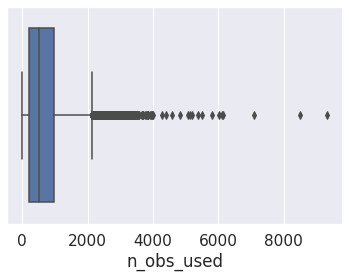

In [262]:
sns.boxplot(x=train['n_obs_used'])

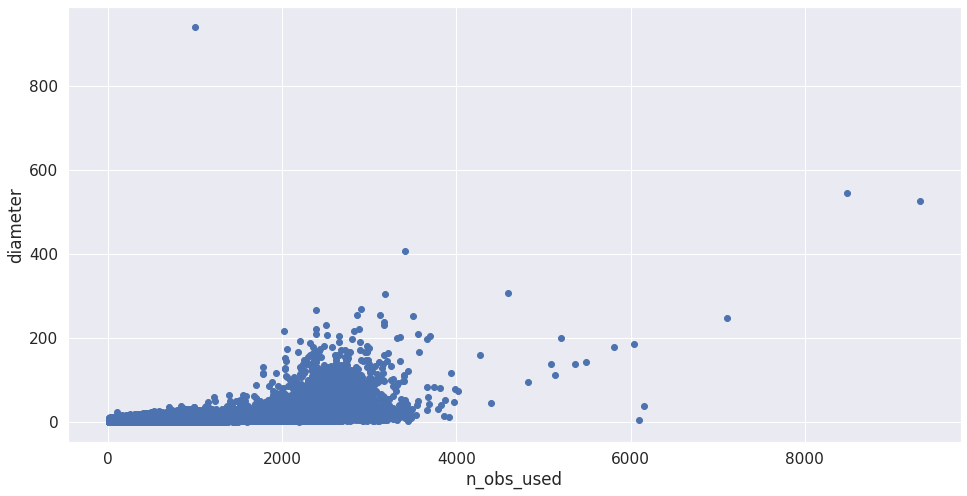

In [263]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['n_obs_used'], train['diameter'])
ax.set_xlabel('n_obs_used')
ax.set_ylabel('diameter')
plt.show()

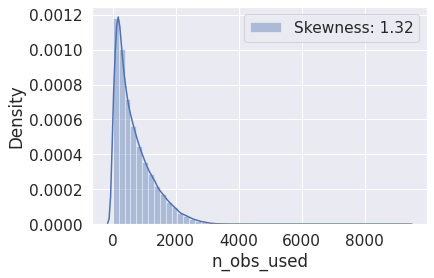

In [264]:
sns.distplot(train['n_obs_used'], label = 'Skewness: %.2f'%(train['n_obs_used'].skew()))
plt.legend(loc = 'best')


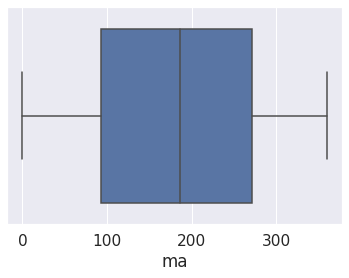

In [266]:
sns.boxplot(x=train['ma'])


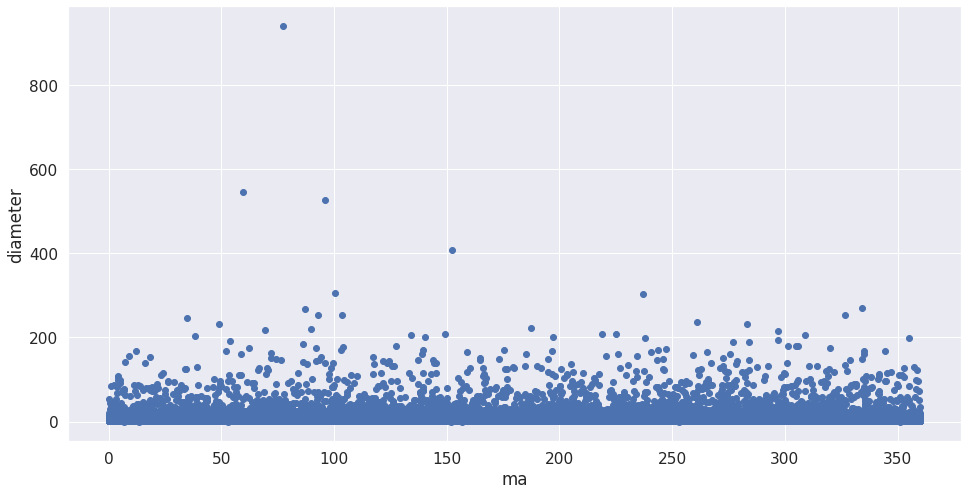

In [267]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['ma'], train['diameter'])
ax.set_xlabel('ma')
ax.set_ylabel('diameter')
plt.show()

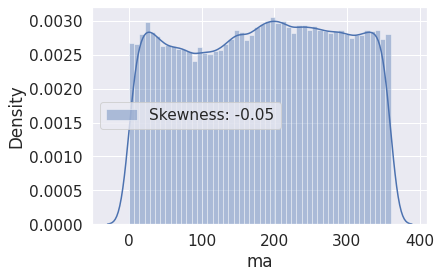

In [268]:
sns.distplot(train['ma'], label = 'Skewness: %.2f'%(train['ma'].skew()))
plt.legend(loc = 'best')

Skewness and Outliers check are done now.

Now, checking the relation of diameter with H and albedo given in the linkhttps://cneos.jpl.nasa.gov/tools/ast_size_est.html

In [269]:
import math
def est_diameter(a,h) :
  r=(3.1236-(0.5*math.log10(a))-(0.2*h))
  d=math.pow(10,r)
  return d

In [271]:
for index,value in train.iterrows() :
  a=value['albedo']
  h=value['H']
  train.at[index,'estimate_diameter']=est_diameter(a,h)

In [272]:
train.head()

a         e          i          om           w         q  data_arc  \
15  2.233986  0.578048   2.393483  235.563313  296.487915  0.942634  3.162278   
26  2.431534  0.604325   0.781588  344.280936  225.618402  0.962097  5.000000   
31  2.410801  0.606140  17.712704  299.859503  145.116152  0.949519  3.741657   
35  2.582433  0.685894   6.176442  357.495406  269.247685  0.811159  5.291503   
43  2.180614  0.535663   7.263548  200.375180  145.635460  1.012540  9.327379   

    condition_code  n_obs_used     H  diameter  albedo         n          ma  \
15             8.0        25.0  23.6     0.032   0.609  0.295178   13.358823   
26             8.0        35.0  23.0     0.051   0.434  0.259946  351.195301   
31             8.0        40.0  23.5     0.063   0.176  0.263307    6.805061   
35             7.0        48.0  22.1     0.075   0.448  0.237498   52.768682   
43             6.0        65.0  23.5     0.088   0.092  0.306081  156.602244   

    class_AMO  class_APO  class_AST  class_ATE  class_CEN  class_HYA  \
15        0.0        1.0        0.0        0.0        0.0        0.0   
26        0.0        1.0        0.0        0.0        0.0        0.0   
31        0.0        1.0        0.0        0.0        0.0        0.0   
35        0.0        1.0        0.0        0.0        0.0        0.0   
43        0.0        1.0        0.0        0.0        0.0        0.0   

    class_IEO  class_IMB  class_MBA  class_MCA  class_OMB  class_PAA  \
15        0.0        0.0        0.0        0.0        0.0        0.0   
26        0.0        0.0        0.0        0.0        0.0        0.0   
31        0.0        0.0        0.0        0.0        0.0        0.0   
35        0.0        0.0        0.0        0.0        0.0        0.0   
43        0.0        0.0        0.0        0.0        0.0        0.0   

    class_TJN  class_TNO  neo_N  neo_Y  pha_N  pha_Y  estimate_diameter  
15        0.0        0.0    0.0    1.0    1.0    0.0           0.032456  
26        0.0        0.0    0.0    1.0    1.0    0.0           0.050682  
31        0.0        0.0    0.0    1.0    1.0    0.0           0.063218  
35        0.0        0.0    0.0    1.0    1.0    0.0           0.075502  
43        0.0        0.0    0.0    1.0    1.0    0.0           0.087439

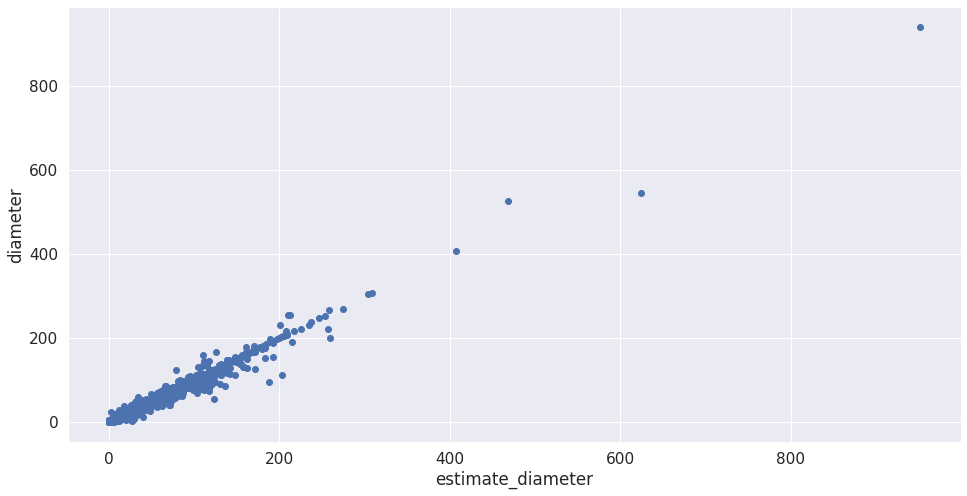

In [274]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['estimate_diameter'], train['diameter'])
ax.set_xlabel('estimate_diameter')
ax.set_ylabel('diameter')
plt.show()

In [276]:
train['diameter'].corr(train['estimate_diameter'])

0.9912824153935399

Hence, albedo and H are highly important in claculating diameter.

Only concern is that in our final test dataset, we do not have albedo, otherwise we could have easily calculated the diameter.


**Endnotes**

Ending week 2 here, with the following things in mind

1) Since, albedo is not there in final test dataset, should we drop it here as it can negatively affect the model while creating it.

2) Is feature engineering the same as what I have done till now or if it is more than I would explore that too in week 3.

**End of Week 2**